In [189]:
from __future__ import print_function
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# for compatible with python 3
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
# Seaborn, useful for graphics
import seaborn as sns

# Import Bokeh modules for interactive plotting
import bokeh.io
#import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.rc('legend', fontsize=20)
# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [191]:
!pwd

/workspace/DDPG-portfolio-management


In [192]:
import pandas as pd
dataset = pd.read_csv("data/Data_preprocessoing.csv")

In [193]:
dataset.head()

Unnamed: 0    DataTime  Asia Bond open  Asia Bond high  Asia Bond low  \
0           0  2005-03-01       -0.026233       -0.018872      -0.030126   
1           1  2005-04-01        0.013158        0.018251       0.008892   
2           2  2005-05-01        0.006197        0.016100       0.000993   
3           3  2005-06-01        0.006115        0.008048       0.004542   
4           4  2005-07-01       -0.002991        0.000499      -0.006730   

   Asia Bond close  Asia Bond volume  Asia Equity open  Asia Equity high  \
0         0.013158                 1         -0.039073          0.007458   
1         0.006197                 1         -0.015145          0.026202   
2         0.006115                 1          0.002845          0.066063   
3        -0.002991                 1          0.016561          0.043472   
4         0.006146                 1          0.044359          0.127940   

   Asia Equity low  ...  US Bond open  US Bond high  US Bond low  \
0        -0.112836  ...     -0.008063     -0.000396    -0.020333   
1        -0.070772  ...      0.015329      0.038638     0.001929   
2        -0.038932  ...      0.009653      0.031362     0.000000   
3        -0.056440  ...      0.006171      0.021636    -0.000953   
4        -0.027040  ...     -0.009514      0.001923    -0.033824   

   US Bond close  US Bond volume  US Equity open  US Equity high  \
0       2.173503               1       -0.021921        0.002786   
1       0.887770               1       -0.038724       -0.006672   
2      -0.463134               1        0.050632        0.088622   
3      -0.338045               1        0.018461        0.050380   
4       0.234266               1        0.051516        0.088409   

   US Equity low  US Equity close  US Equity volume  
0      -0.042528        -0.038724                 1  
1      -0.081275         0.050632                 1  
2       0.014075         0.018461                 1  
3      -0.027995         0.051516                 1  
4       0.024240        -0.016472                 1  

[5 rows x 77 columns]

In [194]:
# df_time = pd.DataFrame({'year': dataset.date.astype(str).str.slice(0, 4).astype(int),
#                         'month': dataset.date.astype(str).str.slice(4, 6).astype(int),
#                         'day': dataset.date.astype(str).str.slice(6, 8).astype(int),
#                         'hour': dataset.time.astype(str).str.slice(0, 2).astype(int),
#                         'minute': dataset.time.astype(str).str.slice(2, 4).astype(int)
#                        })

In [195]:
# time_ref = pd.to_datetime(df_time)
# time_ref = time_ref.to_frame()
# time_ref.columns = ['Time']

In [196]:
# time_ref.head()

In [197]:
# dataset = dataset.merge(time_ref, left_index=True, right_index=True, how='left')

In [198]:
abbreviation = pd.read_csv("data/symbols-Copy1.txt")

In [199]:
abbreviation

symbols
0            Asia Bond
1          Asia Equity
2   Creat China Equity
3          EmgMkt Bond
4        EmgMkt Equity
5          Europe Bond
6        Europe Equity
7          Global Bond
8        Global Equity
9              HY Bond
10         Multi Asset
11          Other Bond
12        Other Equity
13             US Bond
14           US Equity

In [200]:
history = np.empty((15,len(dataset),5))

In [201]:
suffix = [" open", " close", " high", " low", " volume"]

In [202]:
for i_n, i in enumerate(abbreviation['symbols']):
    for j_n, j in enumerate(suffix):
        history[i_n, :, j_n] = dataset[i+j]

In [203]:
history.shape

(15, 141, 5)

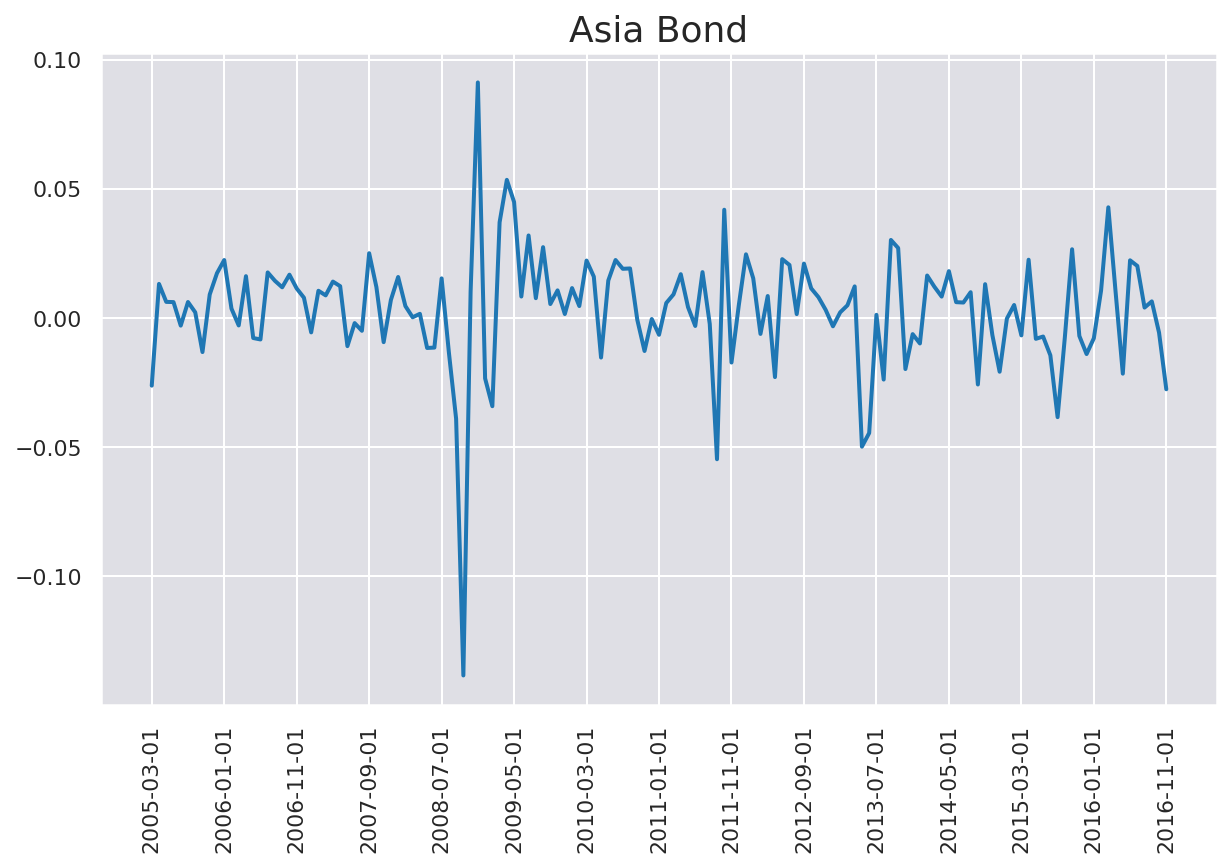

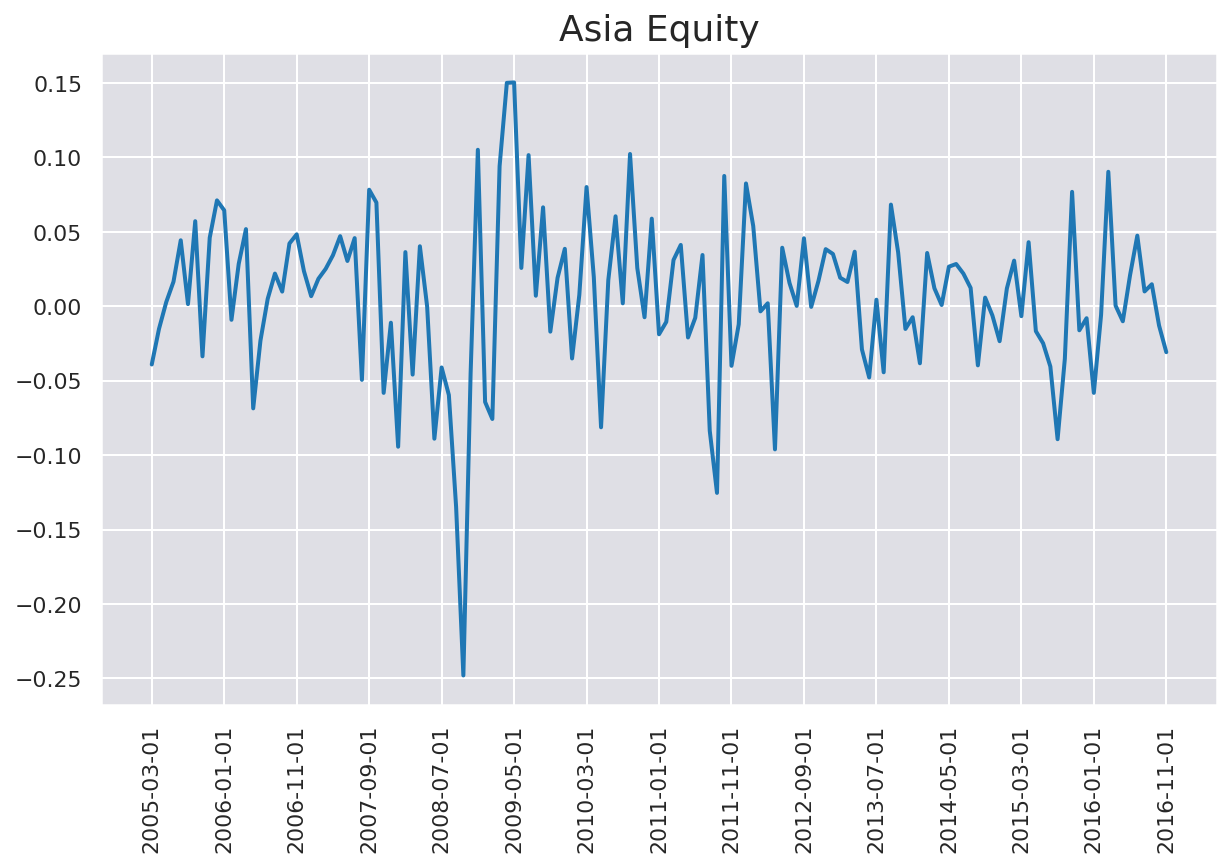

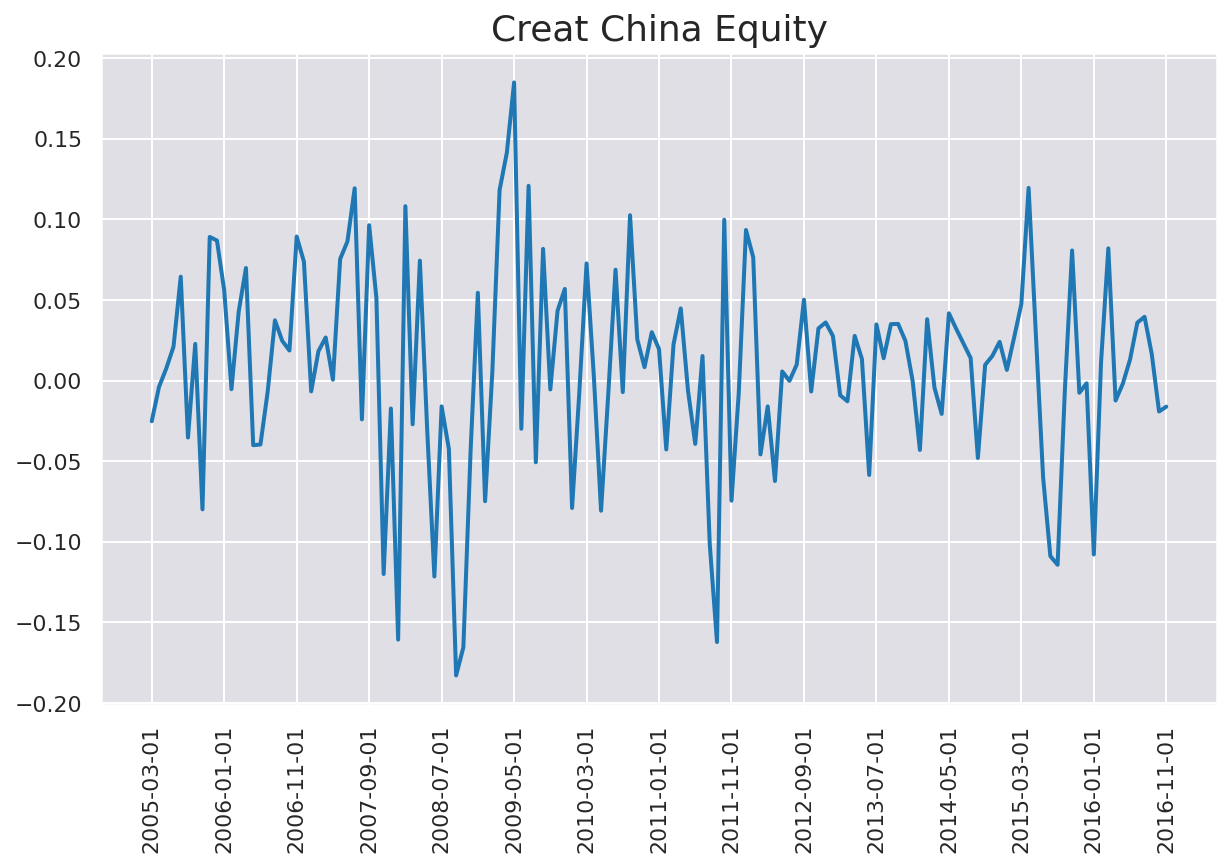

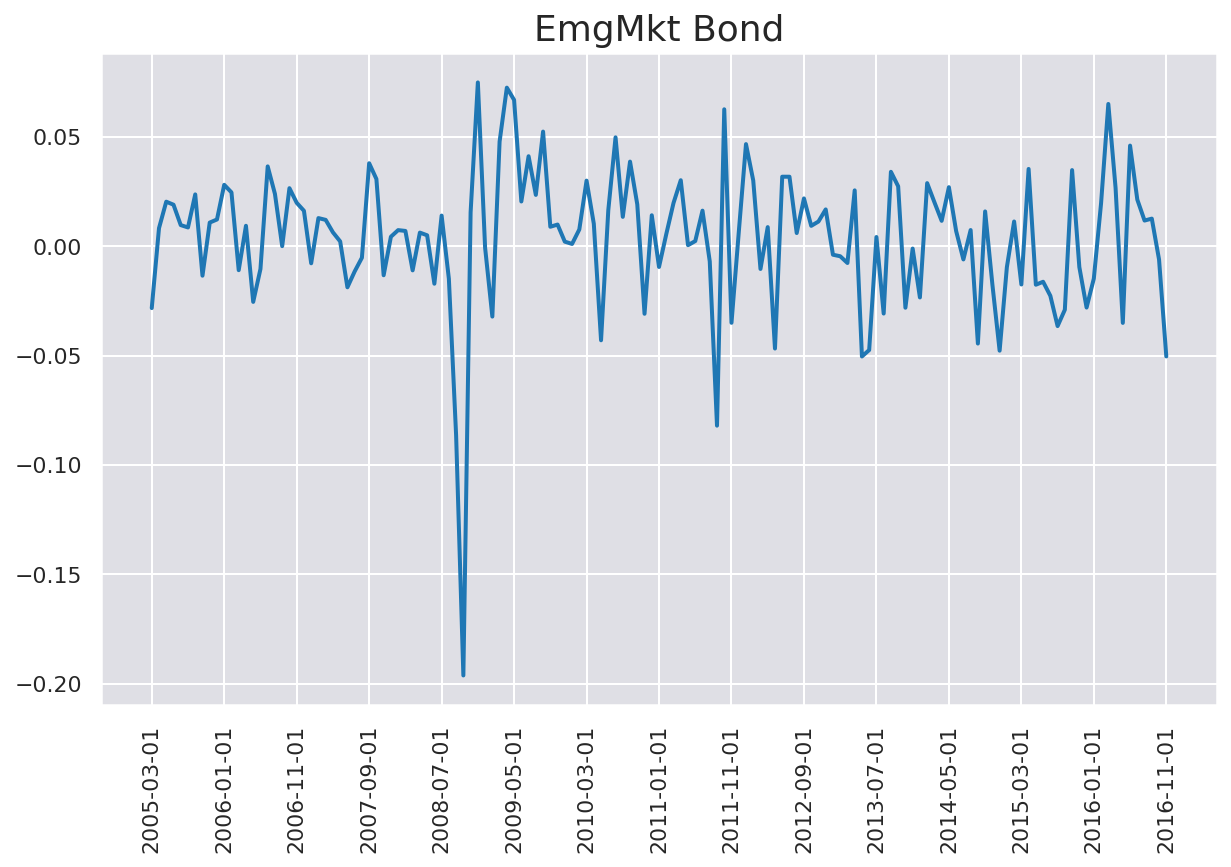

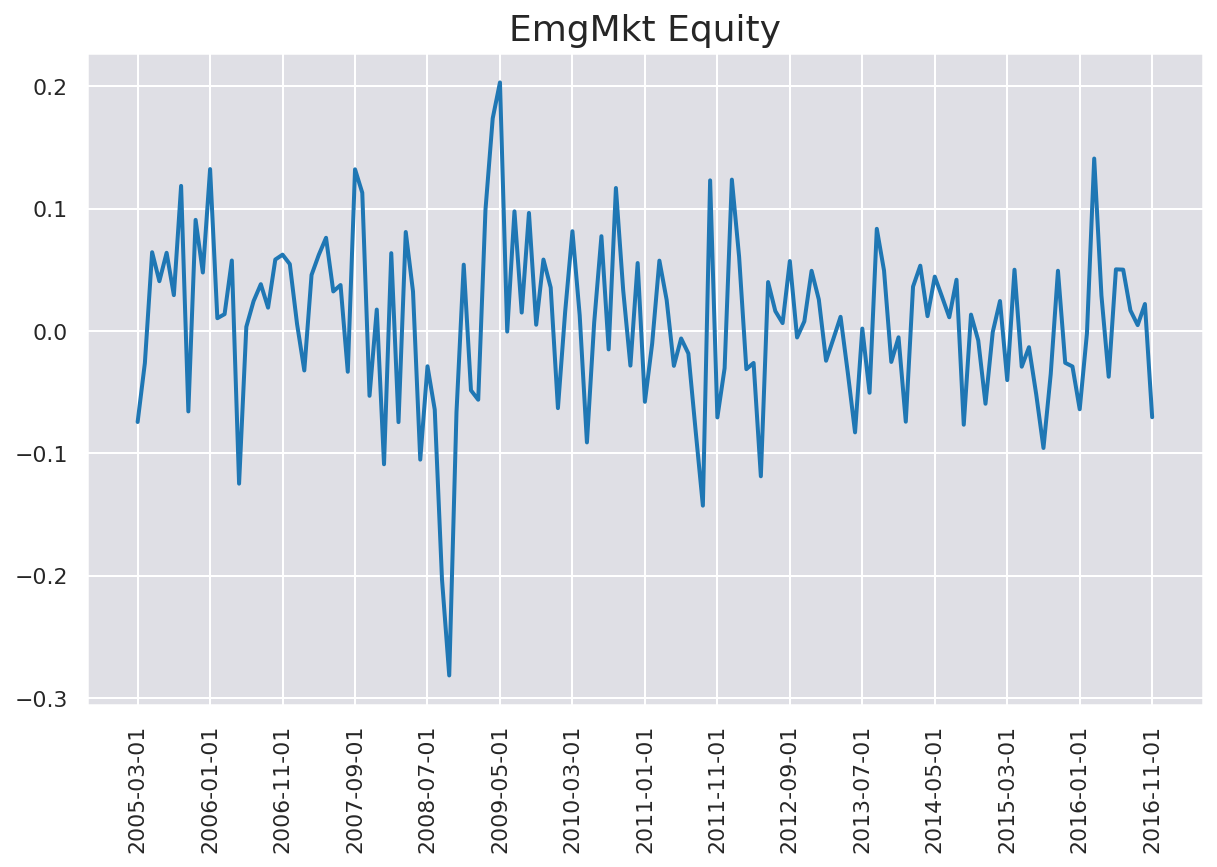

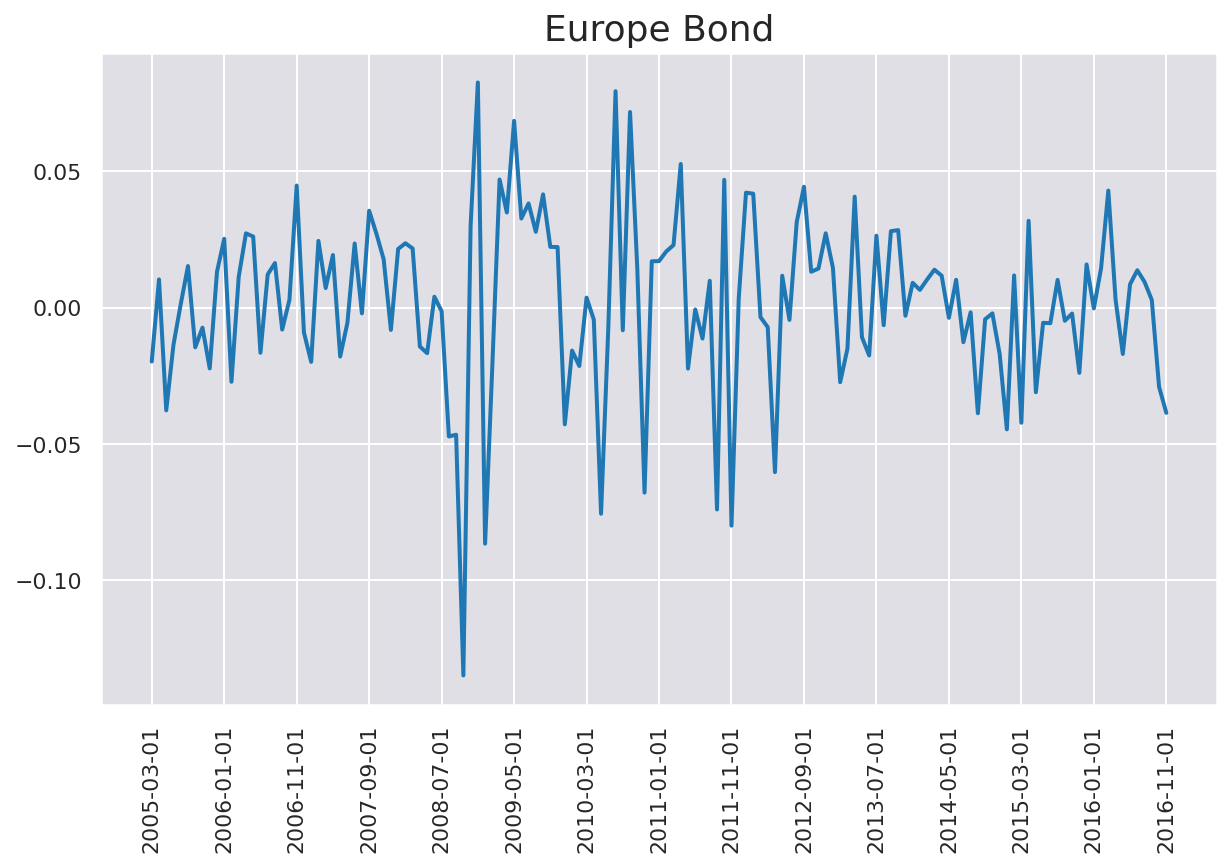

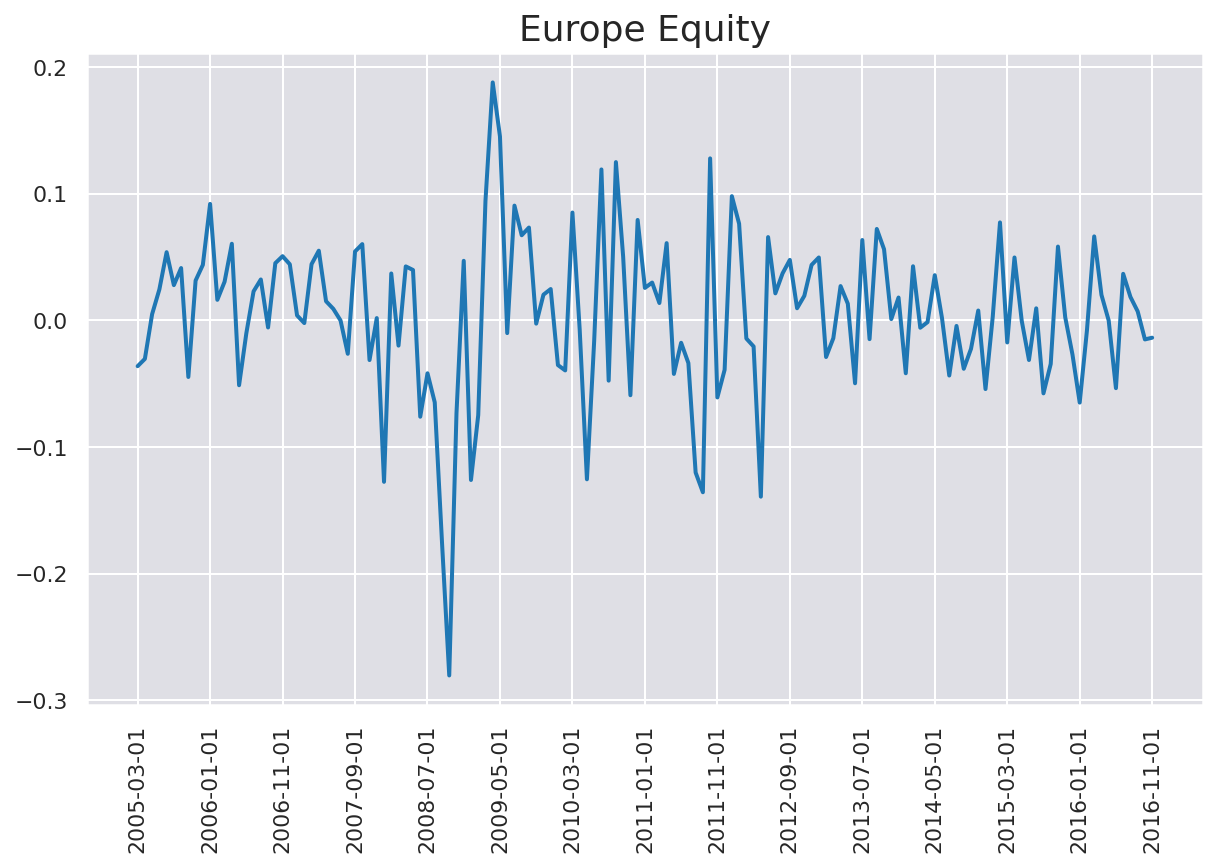

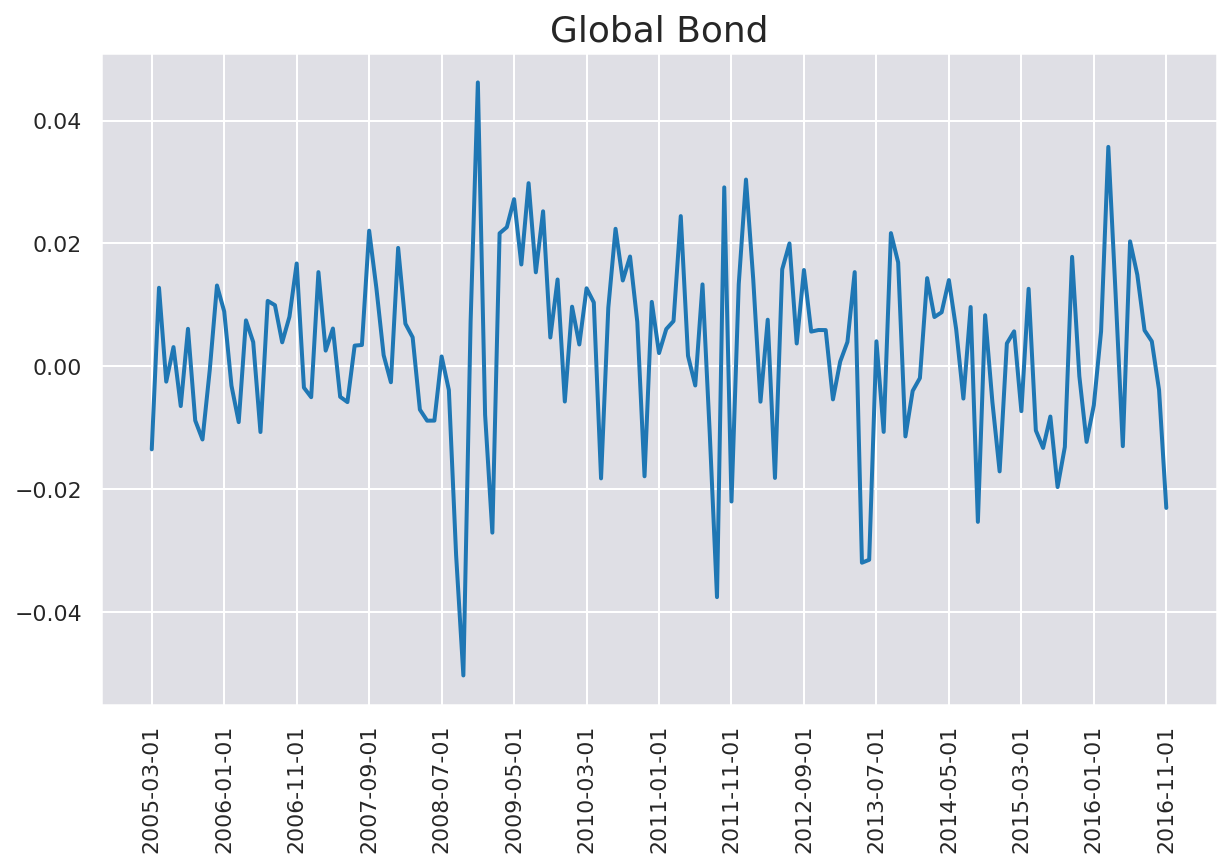

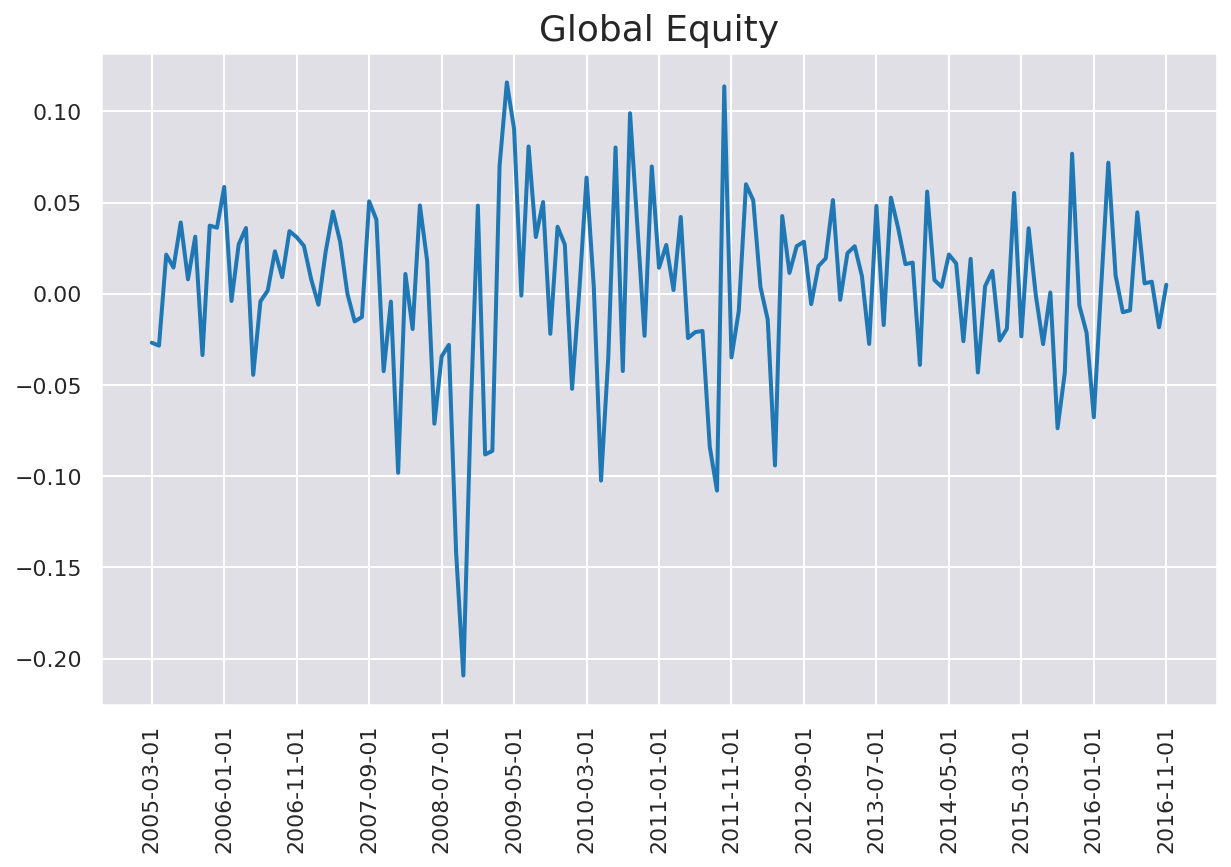

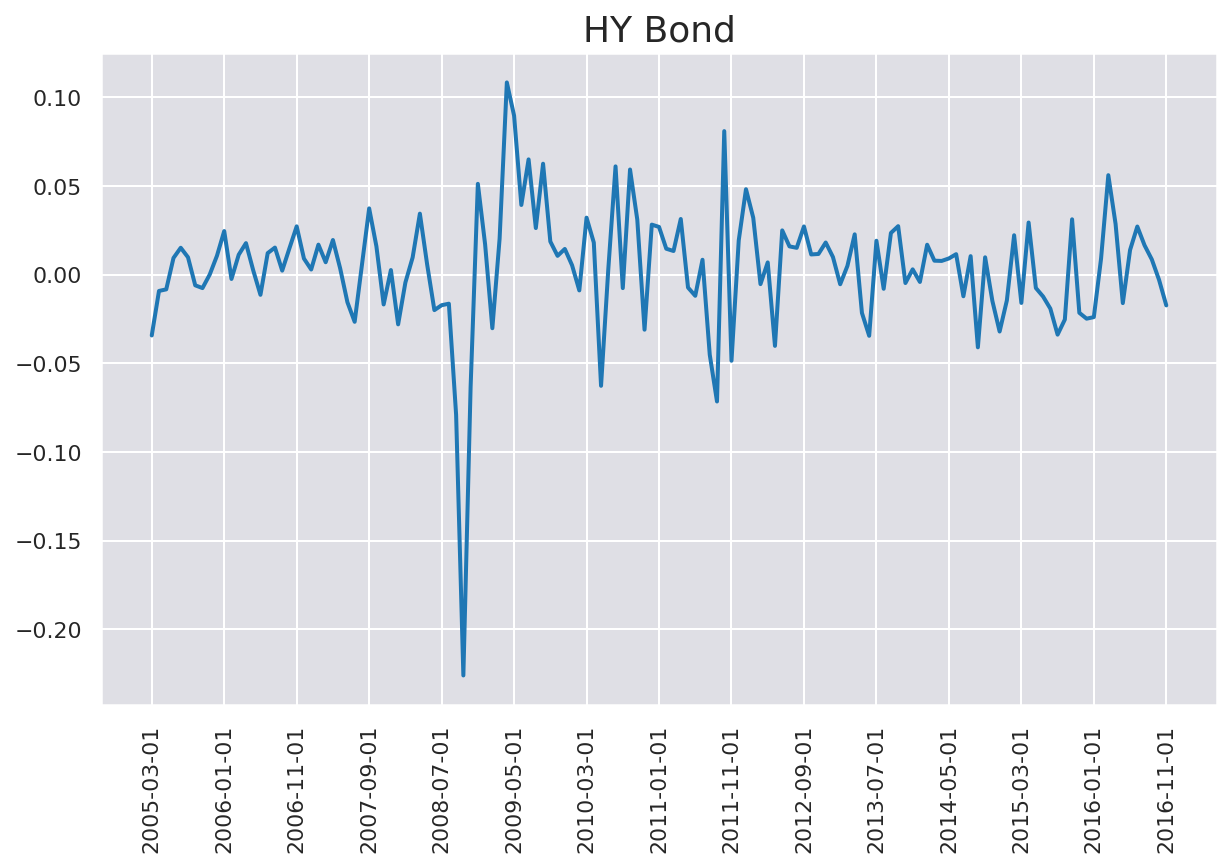

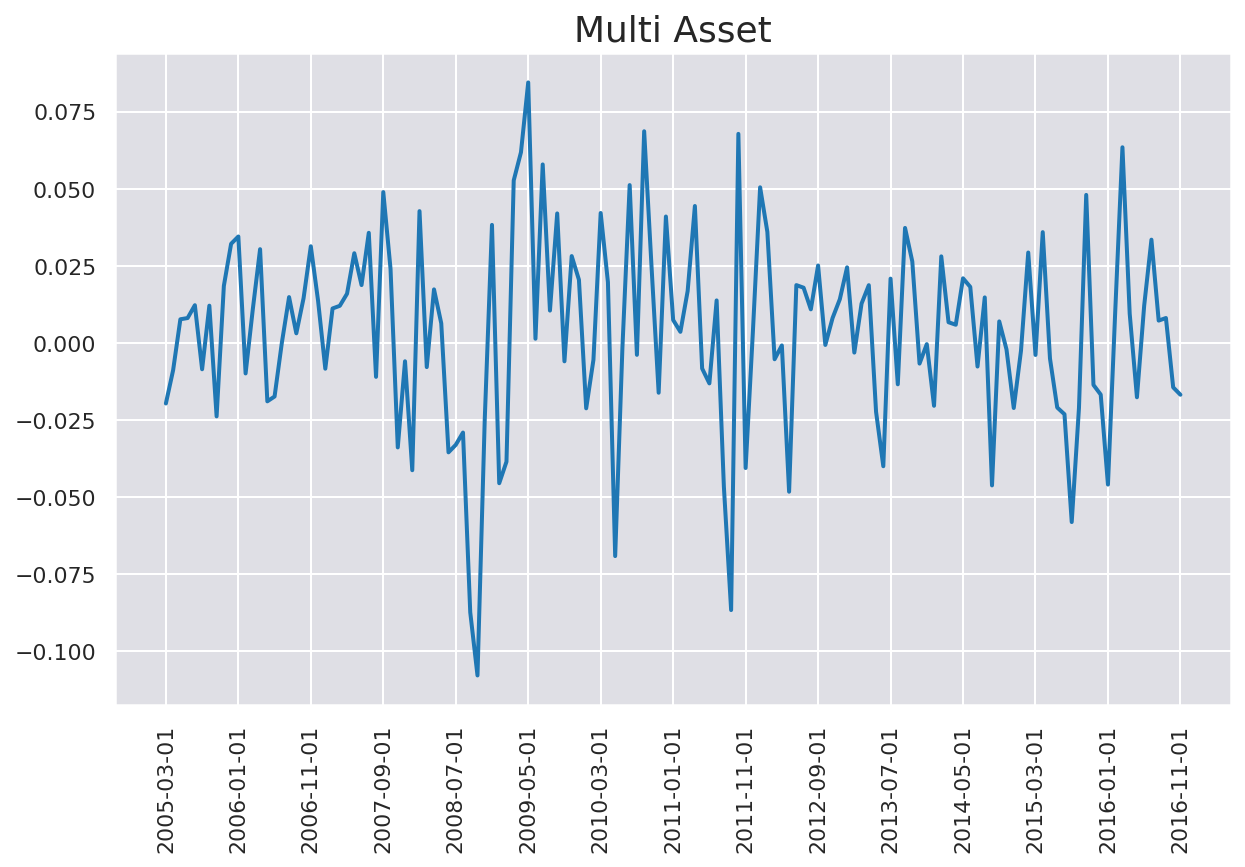

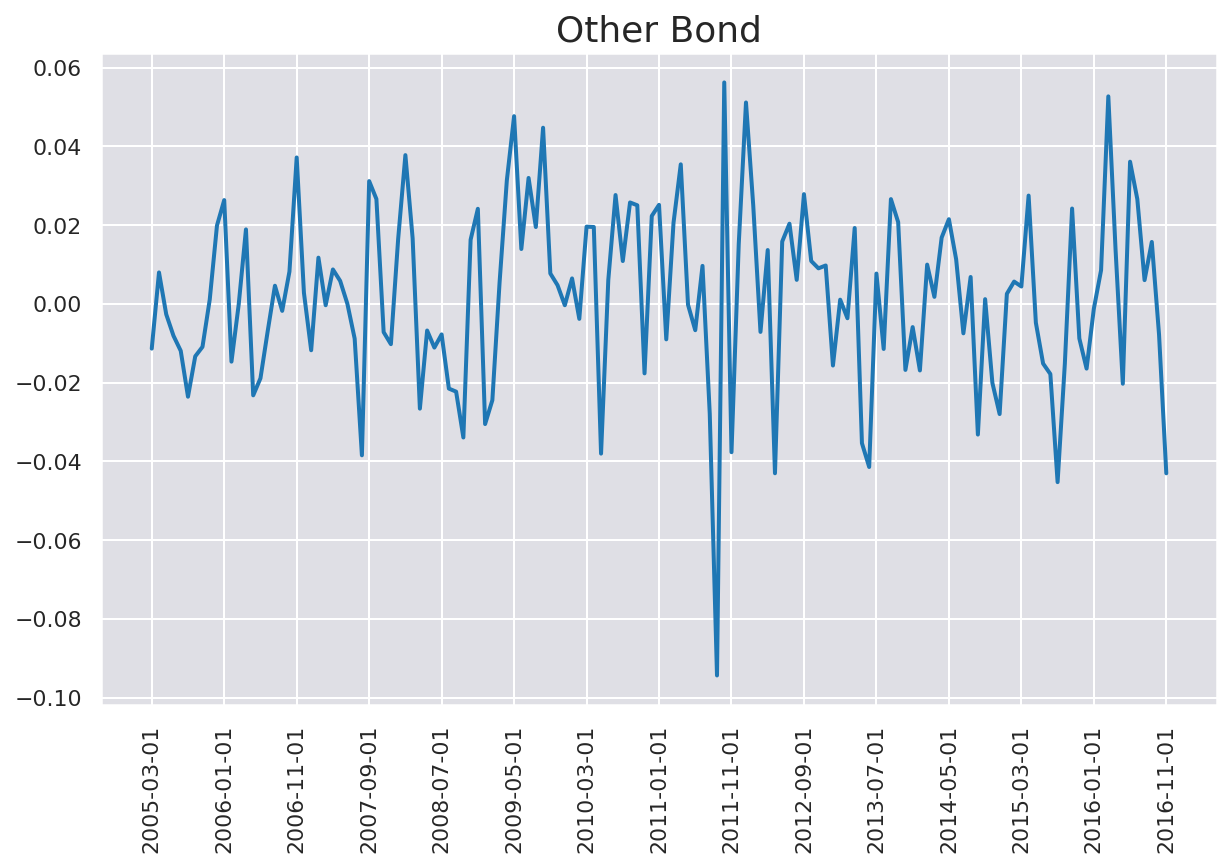

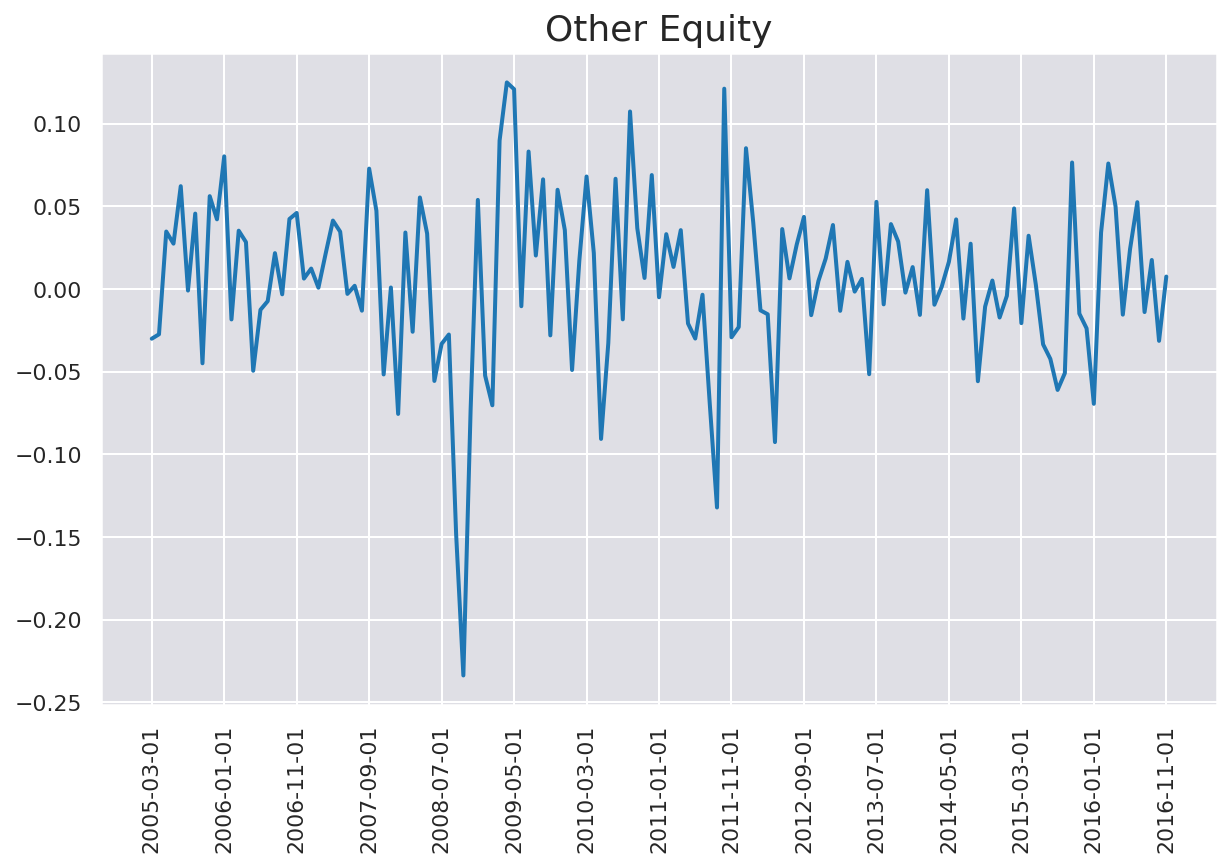

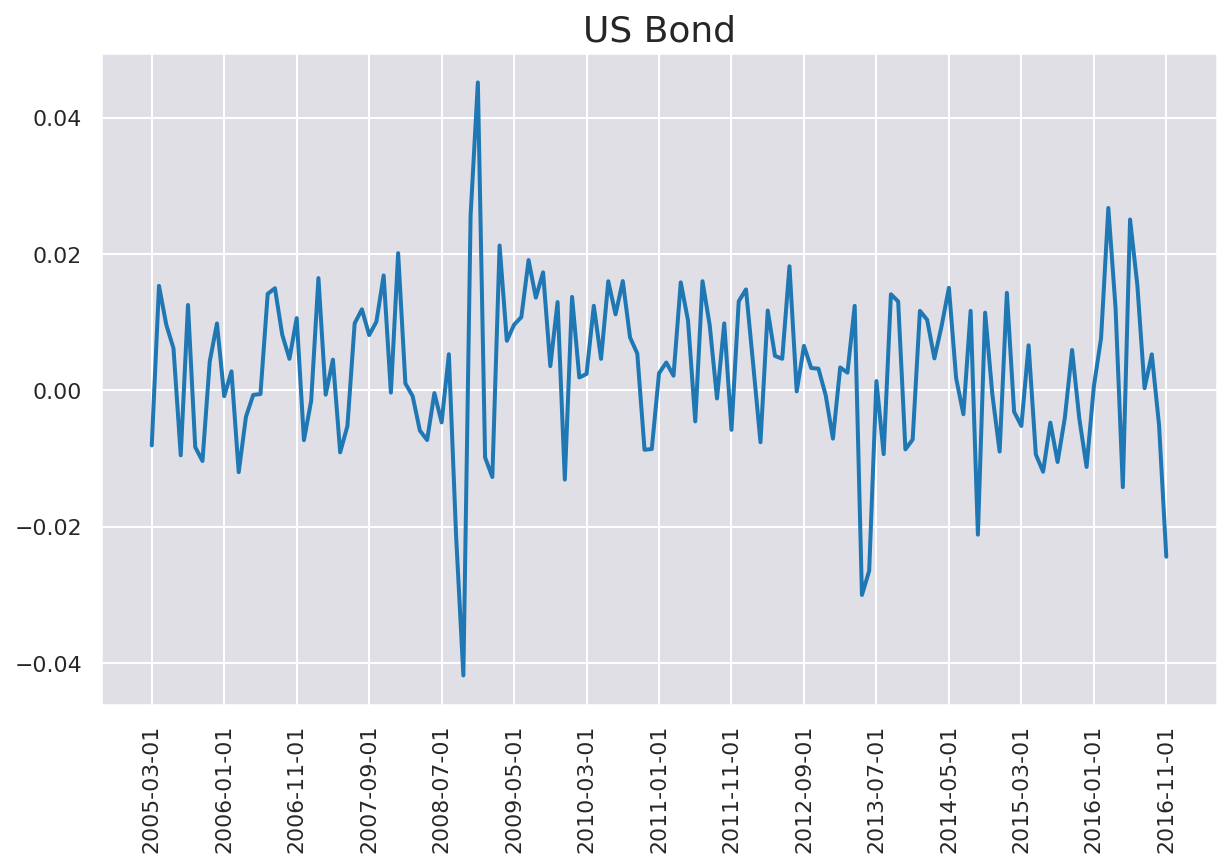

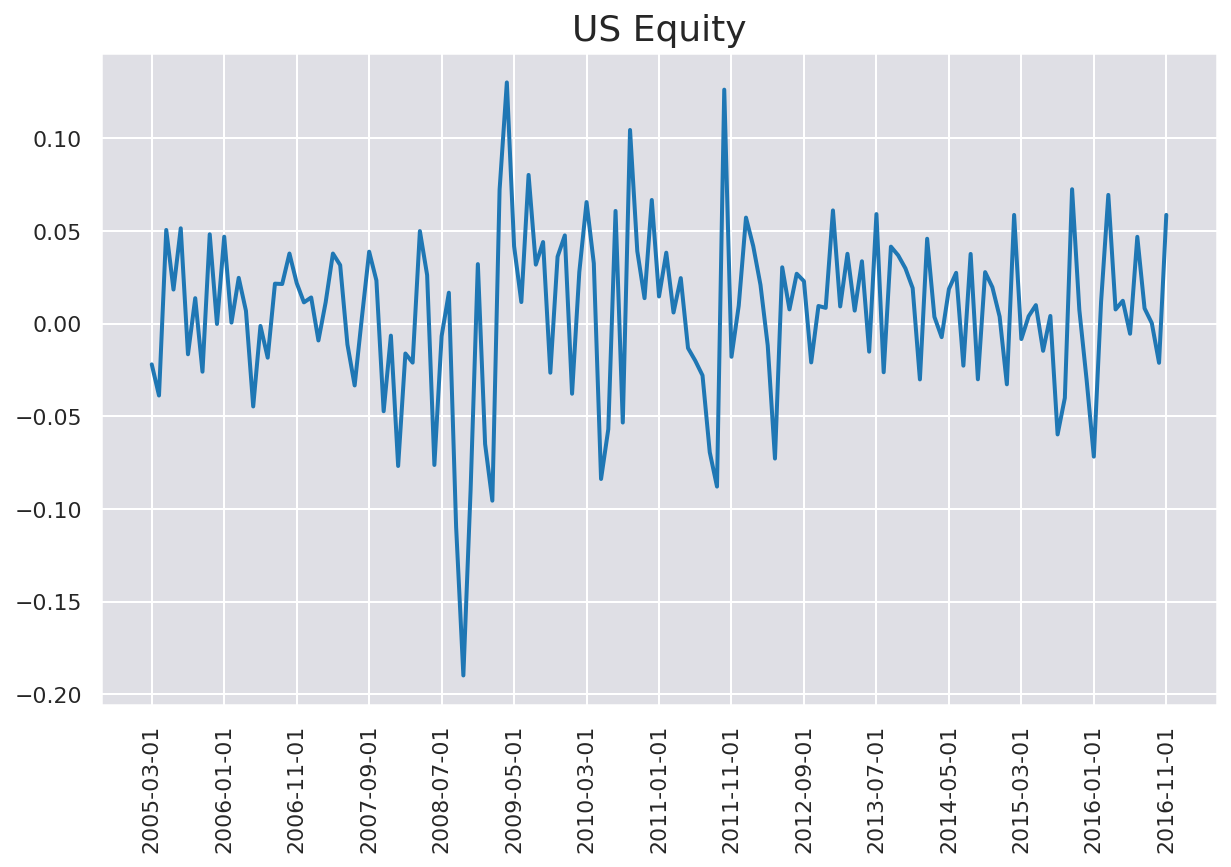

In [205]:
# # visualize stocks open price from 2018-01-01 to 2018-10-29
# if True:
#     date = dataset.DataTime
#     x = range(history.shape[1])
#     for i in range(len(abbreviation)):
#         plt.figure(i)
#         plt.plot(x, history[i, :, 0])  # open, close, high, low, volume = [0, 1, 2, 3, 4]
#         plt.xticks(x[::4000], date[::4000], rotation=30)
#         plt.title(abbreviation.iloc[i, 0])
#         plt.show()

for i in range(len(abbreviation)):
    plt.plot(dataset["DataTime"],history[i,:,0])
    plt.xticks(x[::10], dataset["DataTime"][::10],rotation = 90)
    plt.title(abbreviation.iloc[i, 0])
    plt.show()

In [206]:
# visualize stocks trade volume
# if True:
#     date = dataset.Time
#     x = range(history.shape[1])
#     for i in range(len(abbreviation)):
#         plt.figure(i)
#         plt.plot(x, history[i, :, 4])  # open, cloase, high, low, volume = [0, 1, 2, 3, 4]
#         plt.xticks(x[::4000], date[::4000], rotation=30)
#         plt.title(abbreviation.iloc[i, 0])
#         plt.show()

In [251]:
from model.ddpg.actor import ActorNetwork
from model.ddpg.critic import CriticNetwork
from model.ddpg.ddpg import DDPG
from model.ddpg.ornstein_uhlenbeck import OrnsteinUhlenbeckActionNoise

import numpy as np
import tflearn
import tensorflow as tf

from stock_trading_Copy1 import StockActor, StockCritic, obs_normalizer, get_model_path, get_result_path, \
                          test_model, get_variable_scope

from environment.portfolio_Copy1 import PortfolioEnv

In [208]:
data={'ALL': dataset}

 Train the DDPG model with stock price data every month and play in the next month.

In [209]:
# data = {
#     'Jan': dataset[(dataset.Time <= pd.Timestamp(2018, 1, 31)) & (dataset.Time >= pd.Timestamp(2018, 1, 1))],
#     'Feb': dataset[(dataset.Time <= pd.Timestamp(2018, 2, 28)) & (dataset.Time >= pd.Timestamp(2018, 2, 1))],
#     'Mar': dataset[(dataset.Time <= pd.Timestamp(2018, 3, 31)) & (dataset.Time >= pd.Timestamp(2018, 3, 1))],
#     'Apr': dataset[(dataset.Time <= pd.Timestamp(2018, 4, 30)) & (dataset.Time >= pd.Timestamp(2018, 4, 1))],
#     'May': dataset[(dataset.Time <= pd.Timestamp(2018, 5, 31)) & (dataset.Time >= pd.Timestamp(2018, 5, 1))],
#     'Jun': dataset[(dataset.Time <= pd.Timestamp(2018, 6, 30)) & (dataset.Time >= pd.Timestamp(2018, 6, 1))],
#     'Jul': dataset[(dataset.Time <= pd.Timestamp(2018, 7, 31)) & (dataset.Time >= pd.Timestamp(2018, 7, 1))],
#     'Aug': dataset[(dataset.Time <= pd.Timestamp(2018, 8, 31)) & (dataset.Time >= pd.Timestamp(2018, 8, 1))],
#     'Sep': dataset[(dataset.Time <= pd.Timestamp(2018, 9, 30)) & (dataset.Time >= pd.Timestamp(2018, 9, 1))],
#     'Oct': dataset[(dataset.Time <= pd.Timestamp(2018, 10, 31)) & (dataset.Time >= pd.Timestamp(2018, 10, 1))]
#     }

In [210]:
# data['Jan'].head(5)

In [211]:
# data['Jan'].shape

In [212]:
data['ALL'].shape

(141, 77)

In [213]:
history_Model = np.empty((15,141,5))
for i_n, i in enumerate(abbreviation['symbols']):
     for j_n, j in enumerate(suffix):
            history_Model[i_n, :, j_n] = data["ALL"][i+j]

In [214]:
history_Model.shape

(15, 141, 5)

In [215]:
# history_Jan = np.empty((15,len(data['Jan']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Jan[i_n, :, j_n] = data['Jan'][i+j]
# history_Feb = np.empty((15,len(data['Feb']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Feb[i_n, :, j_n] = data['Feb'][i+j]
# history_Mar = np.empty((15,len(data['Mar']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Mar[i_n, :, j_n] = data['Mar'][i+j]
# history_Apr = np.empty((15,len(data['Apr']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Apr[i_n, :, j_n] = data['Apr'][i+j]
# history_May = np.empty((15,len(data['May']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_May[i_n, :, j_n] = data['May'][i+j]
# history_Jun = np.empty((15,len(data['Jun']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Jun[i_n, :, j_n] = data['Jun'][i+j]
# history_Jul = np.empty((15,len(data['Jul']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Jul[i_n, :, j_n] = data['Jul'][i+j]
# history_Aug = np.empty((15,len(data['Aug']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Aug[i_n, :, j_n] = data['Aug'][i+j]
# history_Sep = np.empty((15,len(data['Sep']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Sep[i_n, :, j_n] = data['Sep'][i+j]
# history_Oct = np.empty((15,len(data['Oct']),5))
# for i_n, i in enumerate(abbreviation['symbols']):
#     for j_n, j in enumerate(suffix):
#         history_Oct[i_n, :, j_n] = data['Oct'][i+j]

In [216]:
# history_Jan[0]

In [220]:
batch_size = 6
action_bound = 1.
tau = 1e-3
window_length = 6
predictor_type = 'lstm'
use_batch_norm = True
nb_classes = 15

In [233]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_6/batch_norm/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

INFO:tensorflow:Restoring parameters from weights/stock/lstm/window_6/batch_norm/checkpoint.ckpt


In [234]:
dataset = pd.read_csv("./data/Data_preprocessoing.csv")

In [235]:
df_time = dataset["DataTime"]

In [236]:
df_time

0      2005-03-01
1      2005-04-01
2      2005-05-01
3      2005-06-01
4      2005-07-01
          ...    
136    2016-07-01
137    2016-08-01
138    2016-09-01
139    2016-10-01
140    2016-11-01
Name: DataTime, Length: 141, dtype: object

In [237]:
!pwd

/workspace/DDPG-portfolio-management


In [279]:
from environment.portfolio_Copy1 import PortfolioEnv
env_Model = PortfolioEnv(history_Model, abbreviation, steps=history_Model.shape[1]-8, window_length=window_length,
                        start_idx=data['ALL'].DataTime.iloc[0])
test_model(env_Model, ddpg_model)

       DataTime
0    2005-03-01
1    2005-04-01
2    2005-05-01
3    2005-06-01
4    2005-07-01
..          ...
136  2016-07-01
137  2016-08-01
138  2016-09-01
139  2016-10-01
140  2016-11-01

[141 rows x 1 columns]


[autoreload of environment.portfolio_Copy1 failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/workspace/DDPG-portfolio-management/environment/portfolio_Copy1.py", line 21, in <module>
    df_time = pd.to_datetime(dataset)
  File "/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py"

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
# env_Feb = PortfolioEnv(history_Feb, abbreviation, steps=history_Feb.shape[1]-200, window_length=window_length,
#                         start_idx=data['Feb'].date_index.iloc[0])
# test_model(env_Feb, ddpg_model)

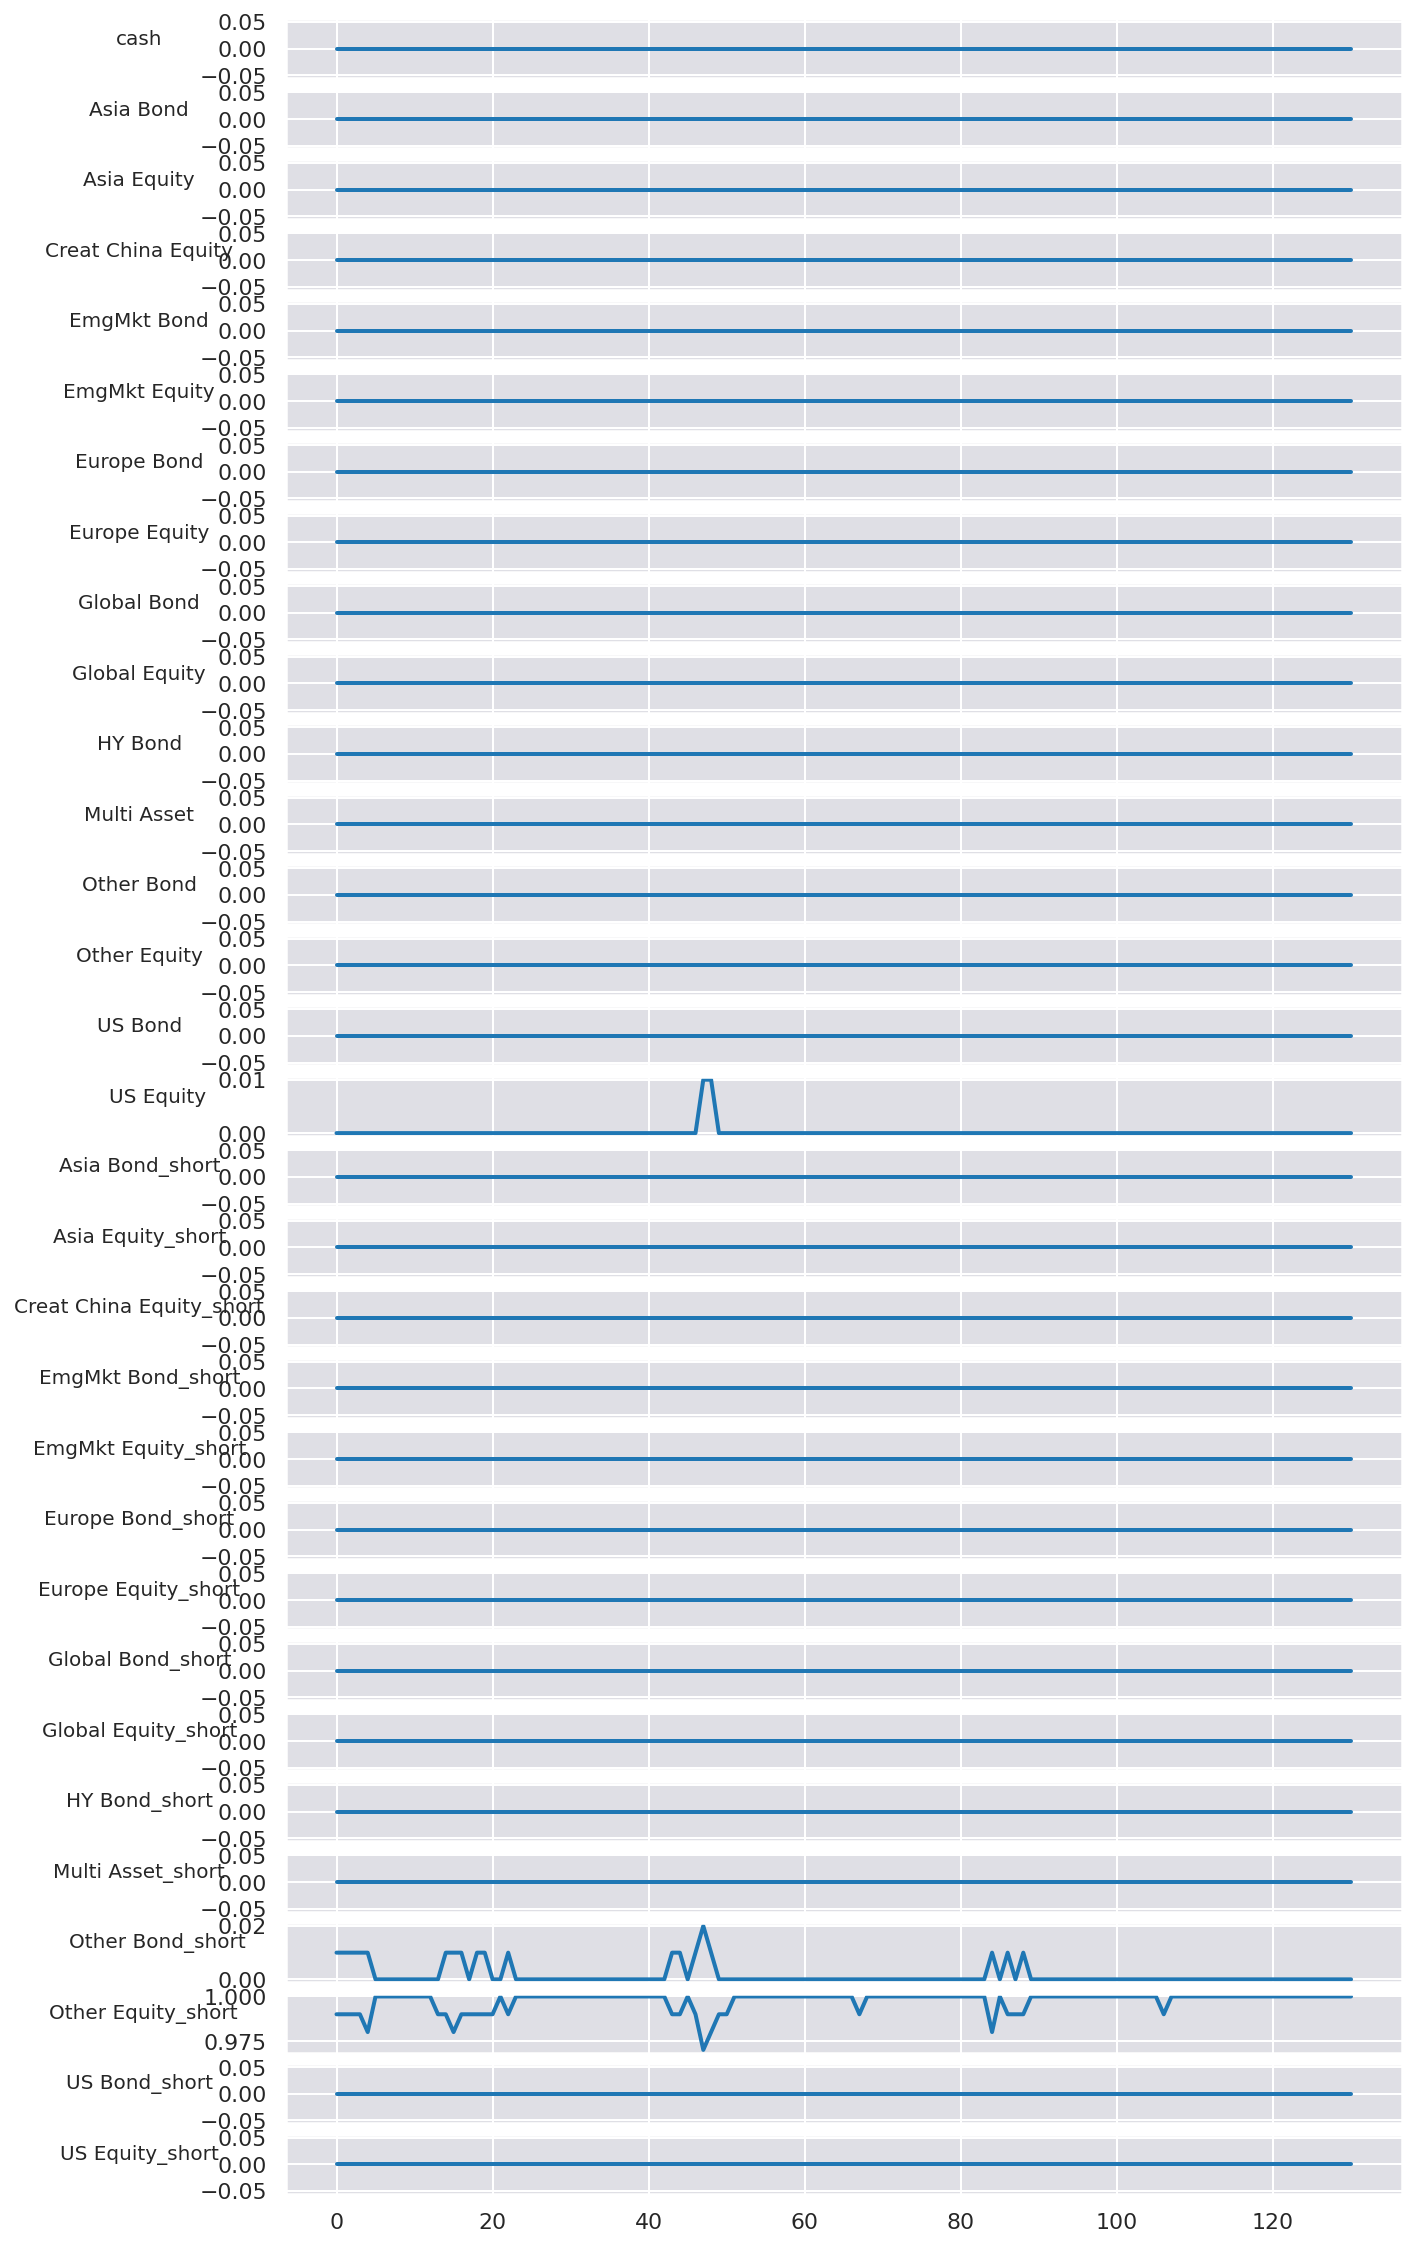

In [242]:
def plot_weights(env_infos):
    weights_change = np.empty((31,len(env_infos)))
    for i in range(len(env_infos)):
        weights_change[:, i] = env_infos[i]['weights']
    long_position = list(abbreviation.iloc[:, 0])
    short_position = []
    for i in long_position:
        short_position.append(i + '_short')
    ylabel = ['cash'] + long_position + short_position
    plt.figure(figsize=(10,20))
    for i in range(31):
        plt.subplot(31, 1, i+1)
        plt.plot(np.round(weights_change[i, :], decimals=2))
        h = plt.ylabel(ylabel[i], fontsize = 10, labelpad=30)
        h.set_rotation(0)
plot_weights(env_Model.infos)

INFO:tensorflow:Restoring parameters from weights/stock/lstm/window_50/batch_norm/checkpoint.ckpt_Episode_1600/checkpoint.ckpt


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


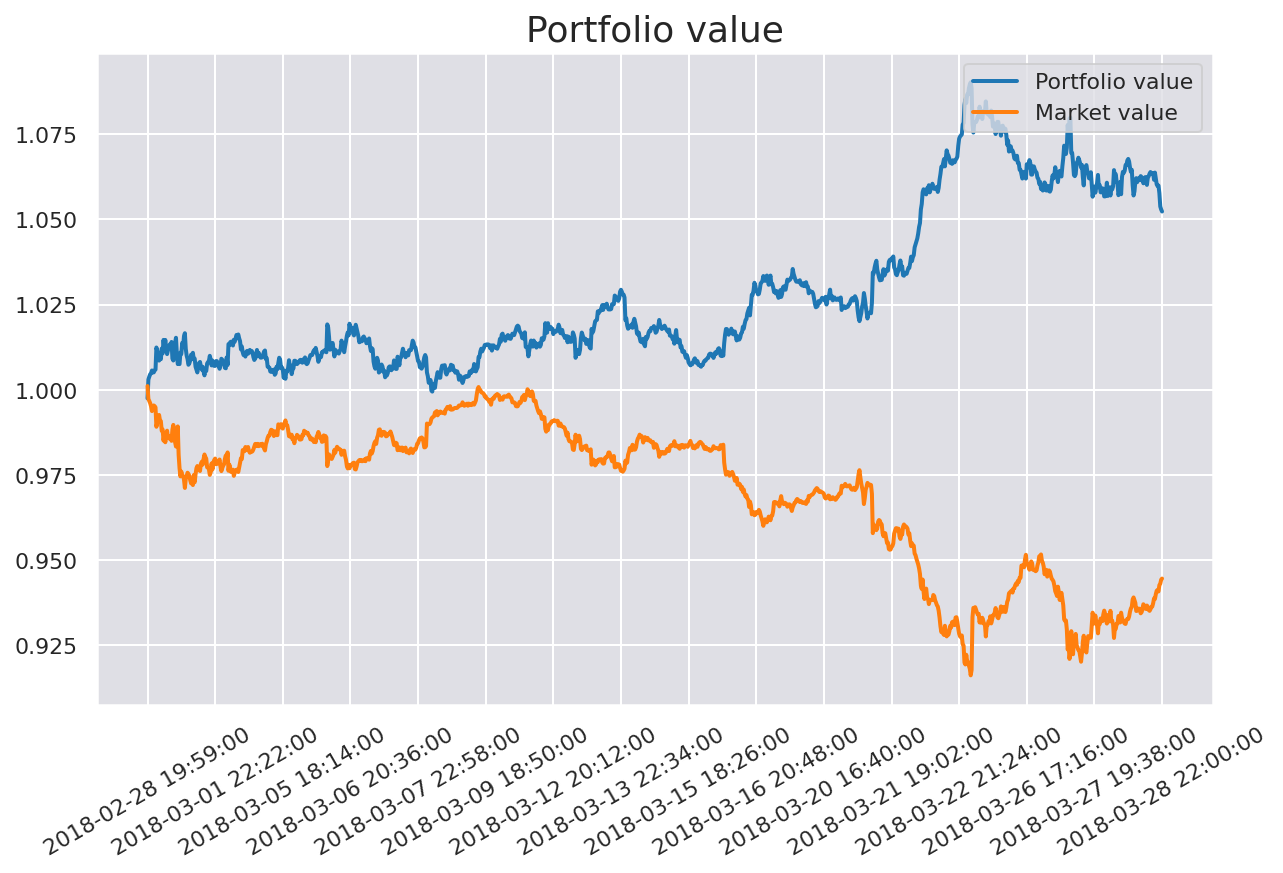

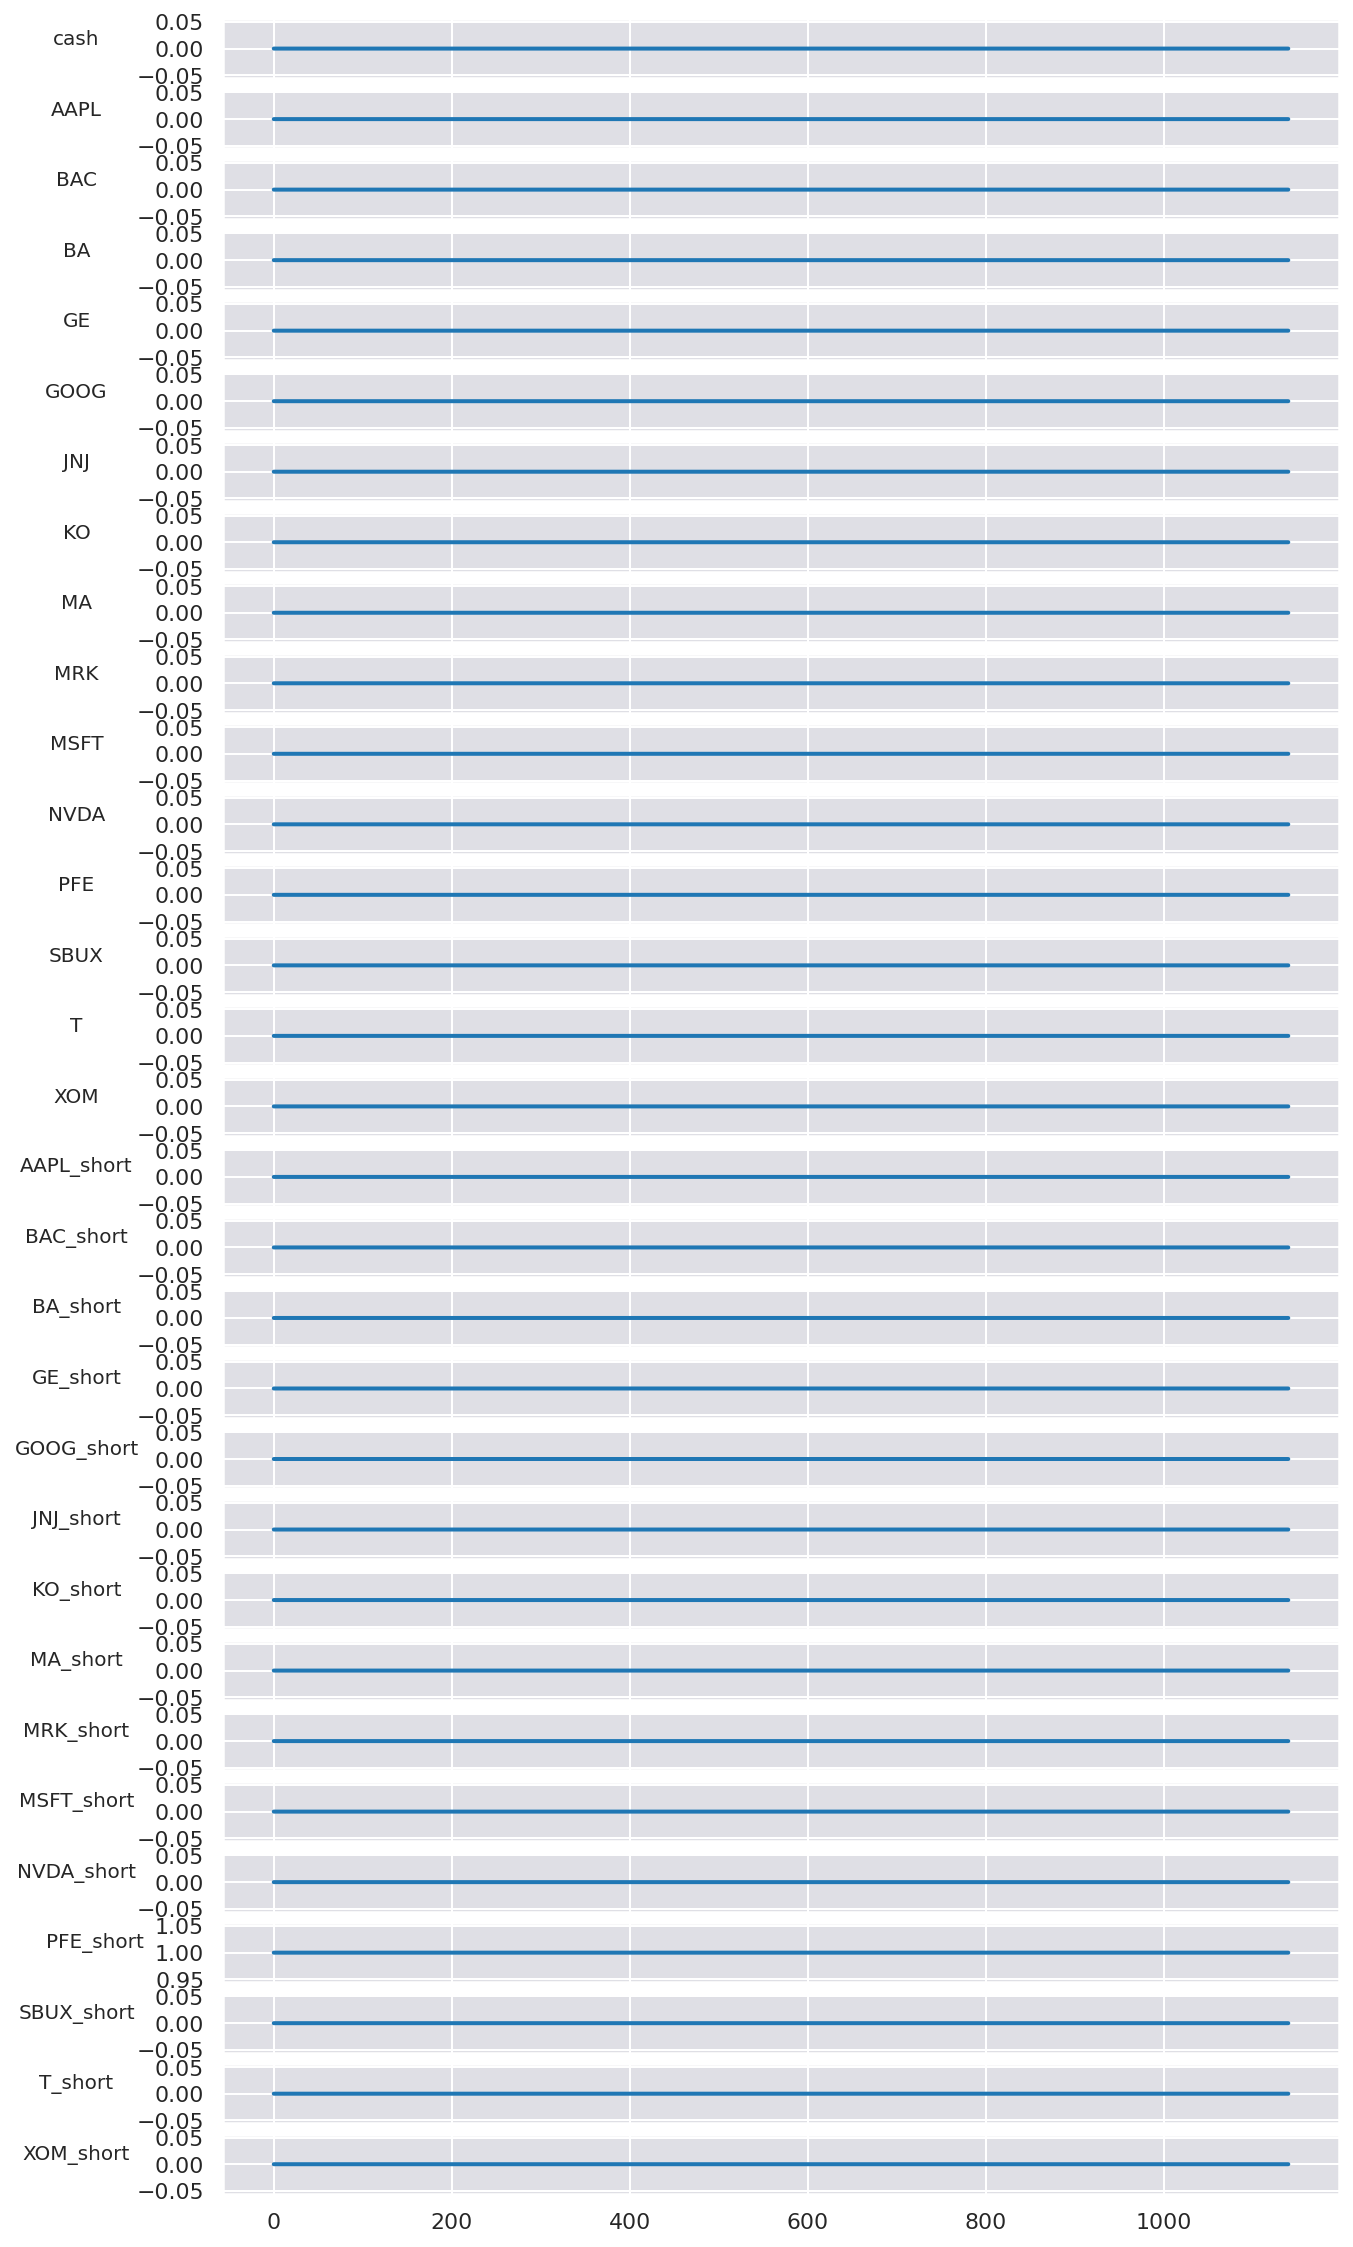

In [90]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_50/batch_norm/checkpoint.ckpt_Episode_1600/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

env_Mar = PortfolioEnv(history_Mar, abbreviation, steps=history_Mar.shape[1]-200, window_length=window_length,
                   start_idx=data['Mar'].date_index.iloc[0])
test_model(env_Mar, ddpg_model)
plot_weights(env_Mar.infos)

INFO:tensorflow:Restoring parameters from weights/stock/lstm/window_50/batch_norm/checkpoint.ckpt_Episode_1600/checkpoint.ckpt


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


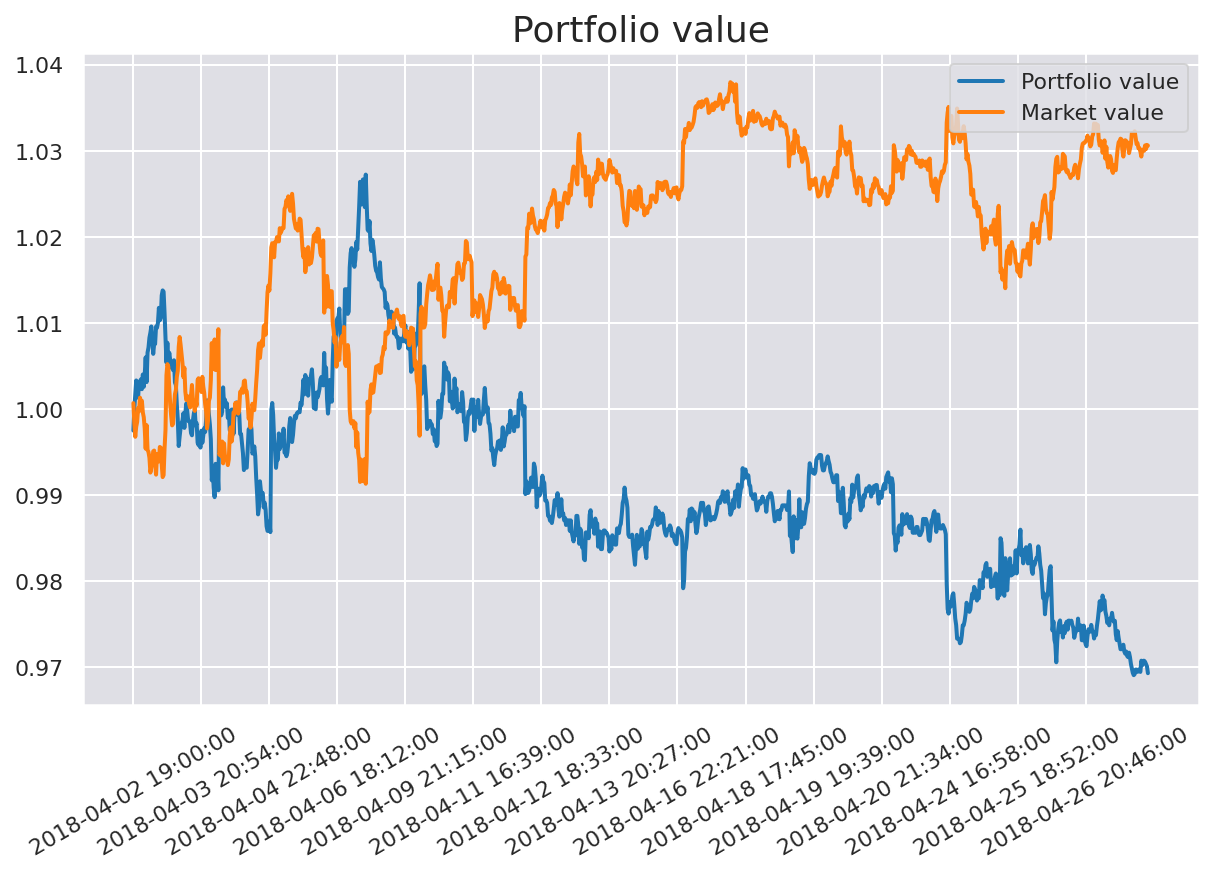

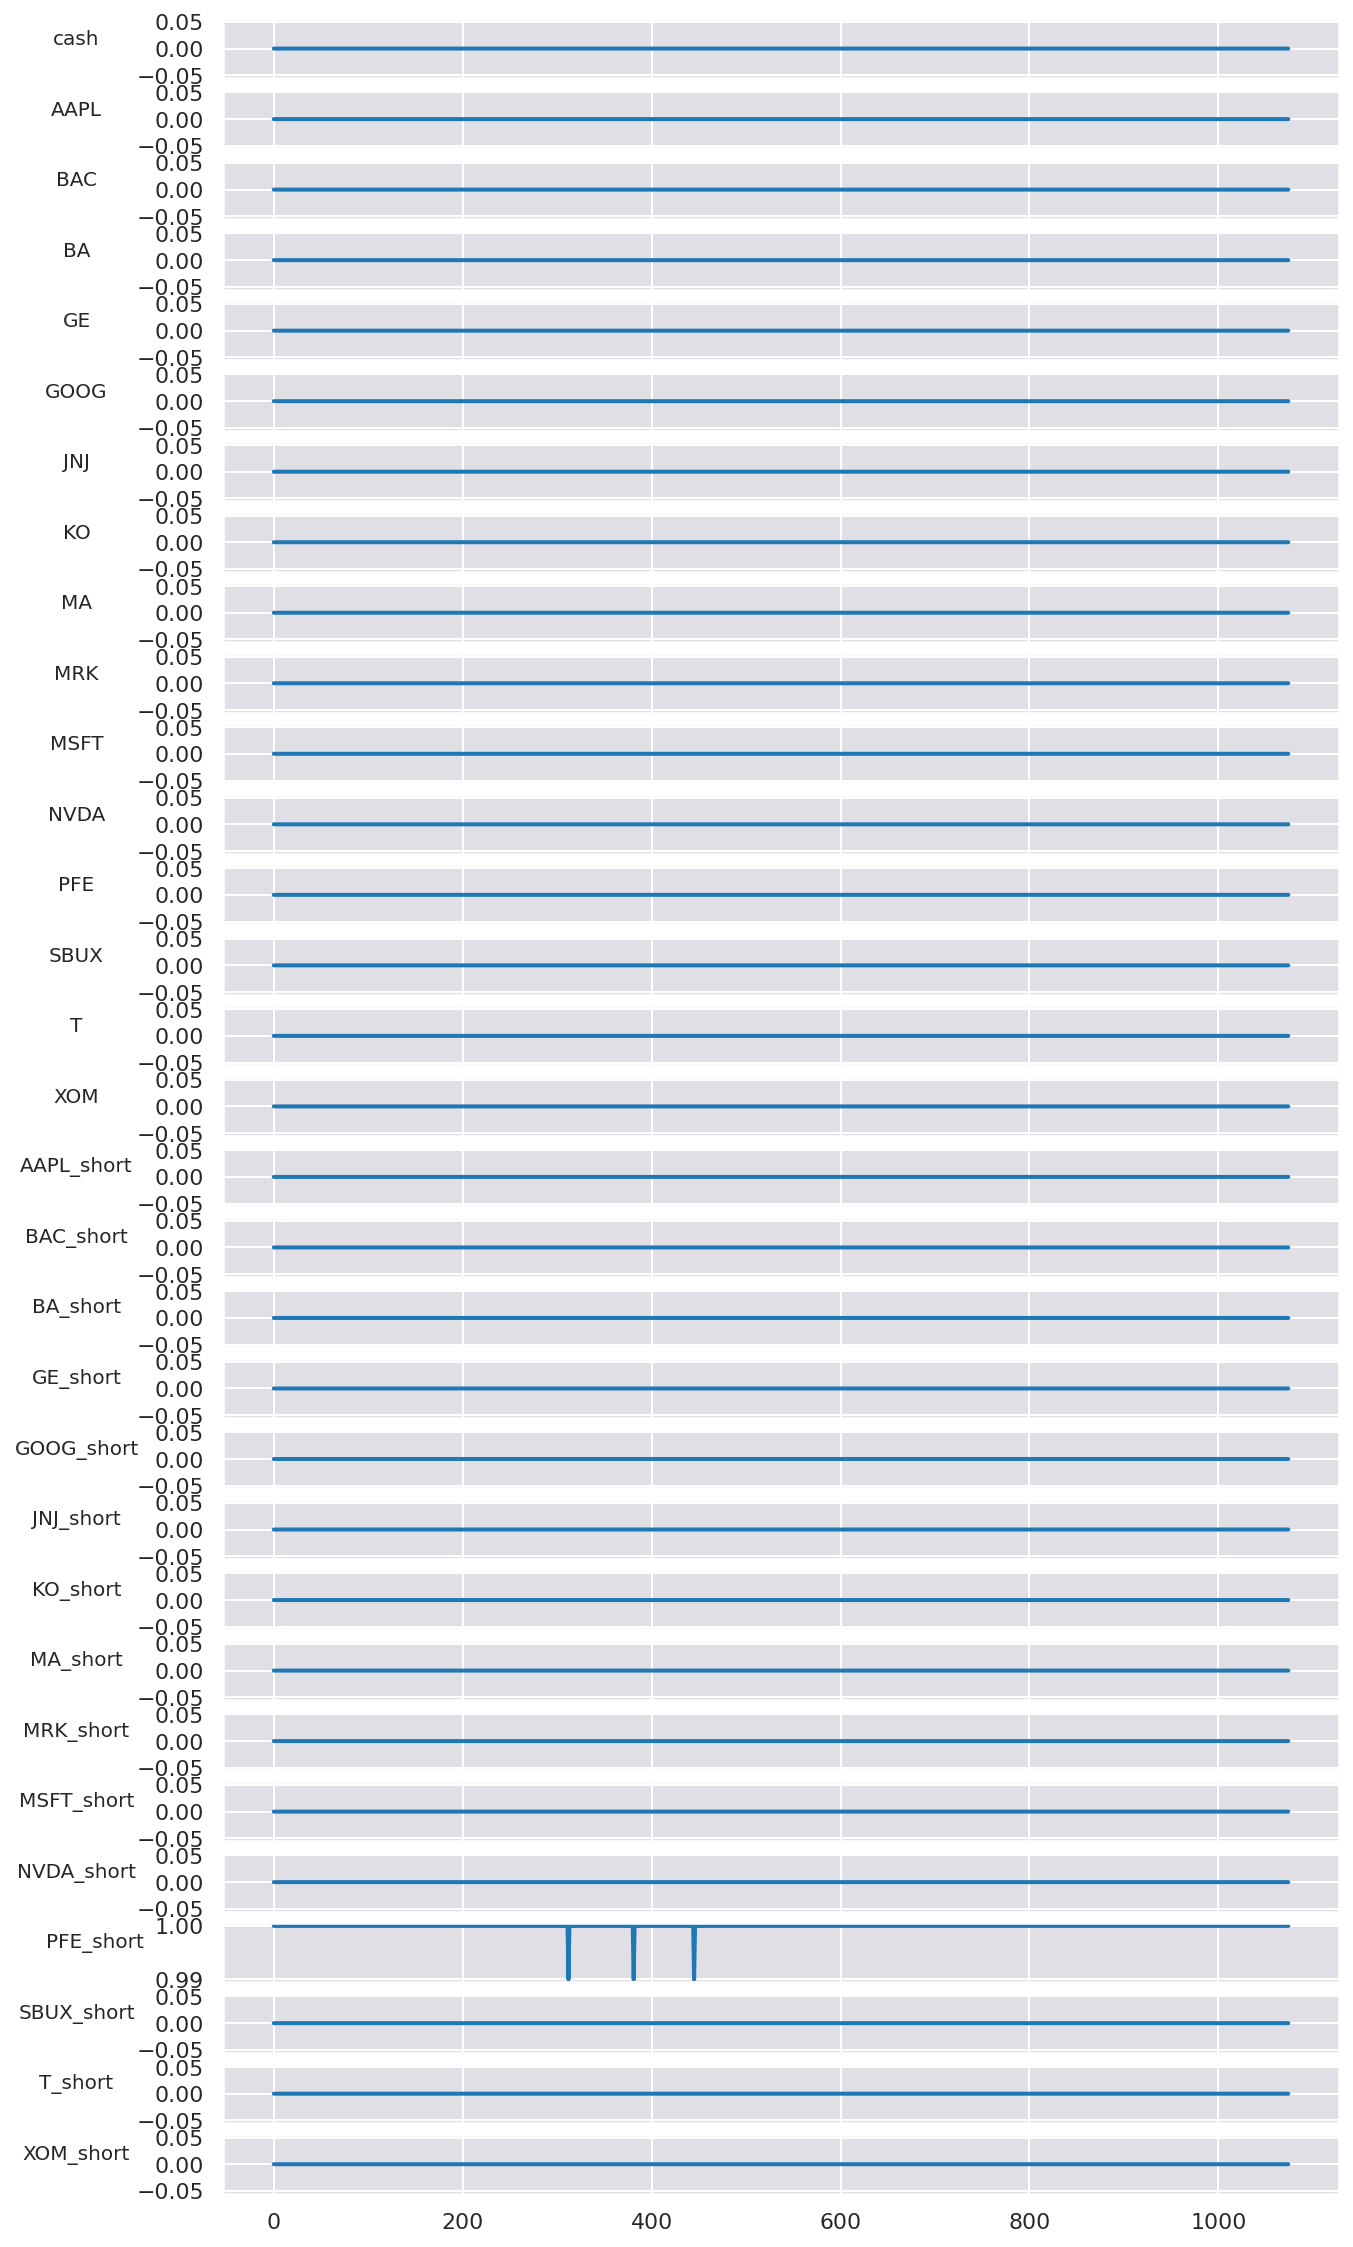

In [92]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_50/batch_norm/checkpoint.ckpt_Episode_1600/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

env_Apr = PortfolioEnv(history_Apr, abbreviation, steps=history_Apr.shape[1]-200, window_length=window_length,
                   start_idx=data['Apr'].date_index.iloc[0])
test_model(env_Apr, ddpg_model)
plot_weights(env_Apr.infos)

Traceback (most recent call last):
  File "/workspace/DDPG-portfolio-management/model/ddpg/ddpg.py", line 63, in initialize
    saver.restore(self.sess, self.model_save_path)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1280, in restore
    if not checkpoint_management.checkpoint_exists_internal(checkpoint_prefix):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/checkpoint_management.py", line 366, in checkpoint_exists_internal
    if file_io.get_matching_files(pathname):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 363, in get_matching_files
    return get_matching_files_v2(filename)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 384, in get_matching_files_v2
    compat.as_bytes(pattern))
tensorflow.python.framework.errors_impl.NotFoundError: weights/stock/lstm/window_30/batch_norm/Model_Apr/checkpoint.ckpt_E

Build model from scratch


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


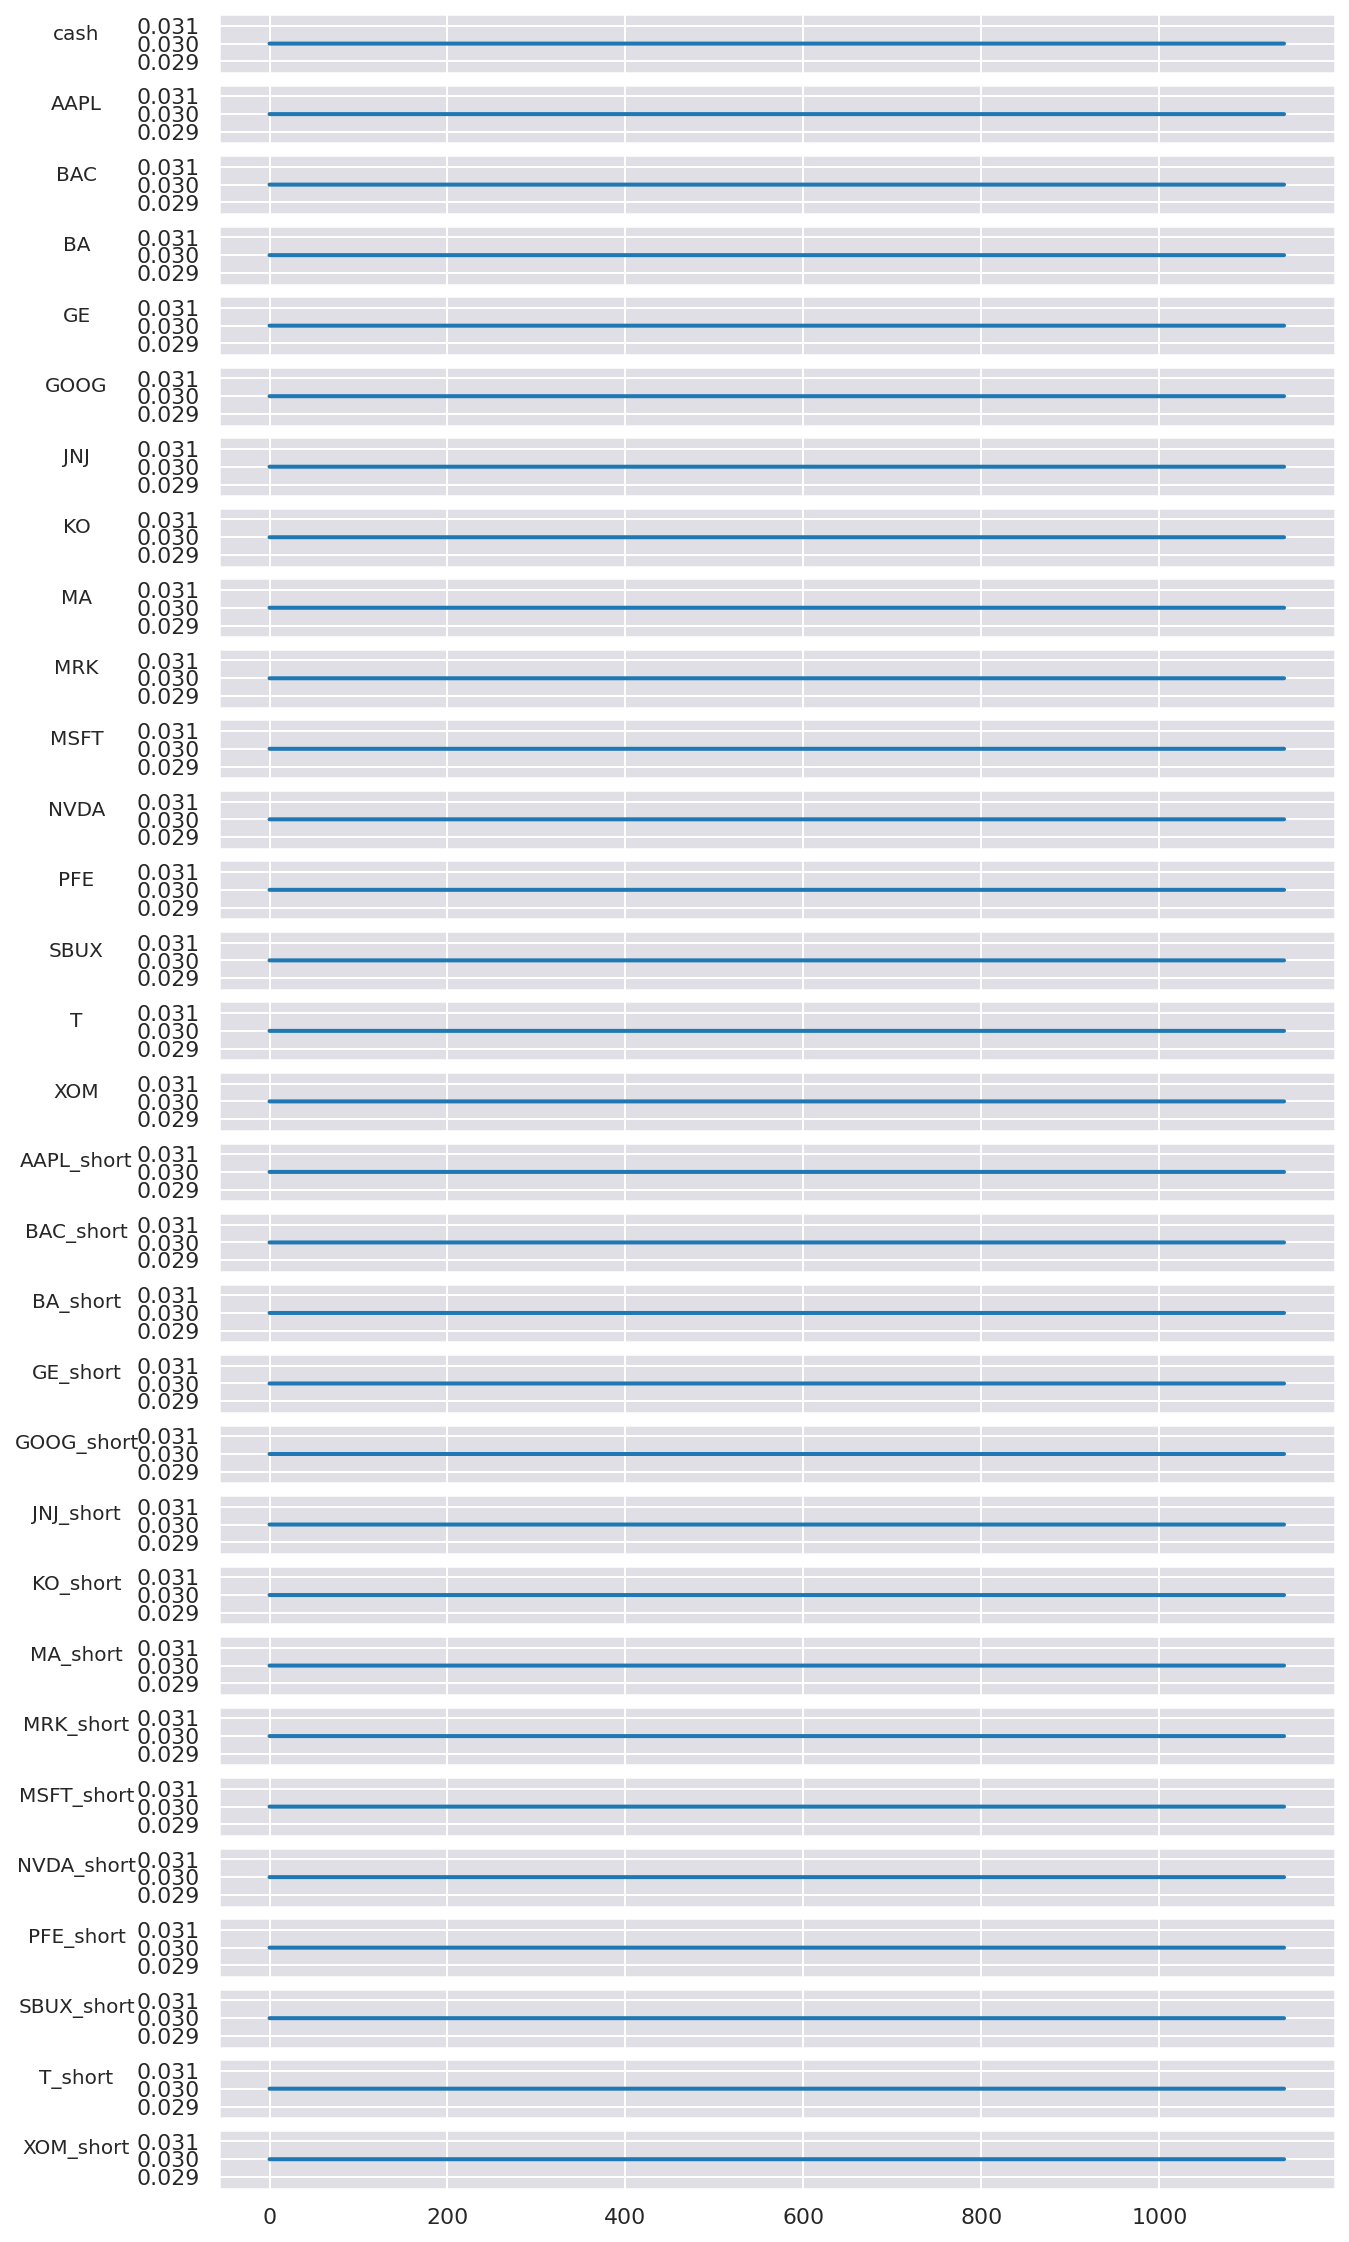

In [93]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_30/batch_norm/Model_Apr/checkpoint.ckpt_Episode_1500/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

env_May = PortfolioEnv(history_May, abbreviation, steps=history_May.shape[1]-200, window_length=window_length,
                   start_idx=data['May'].date_index.iloc[0])
test_model(env_May, ddpg_model)
plot_weights(env_May.infos)

Traceback (most recent call last):
  File "/workspace/DDPG-portfolio-management/model/ddpg/ddpg.py", line 61, in initialize
    saver.restore(self.sess, self.model_save_path)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1280, in restore
    if not checkpoint_management.checkpoint_exists_internal(checkpoint_prefix):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/checkpoint_management.py", line 366, in checkpoint_exists_internal
    if file_io.get_matching_files(pathname):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 363, in get_matching_files
    return get_matching_files_v2(filename)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 384, in get_matching_files_v2
    compat.as_bytes(pattern))
tensorflow.python.framework.errors_impl.NotFoundError: weights/stock/lstm/window_30/batch_norm/Model_May/checkpoint.ckpt_E

Build model from scratch


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


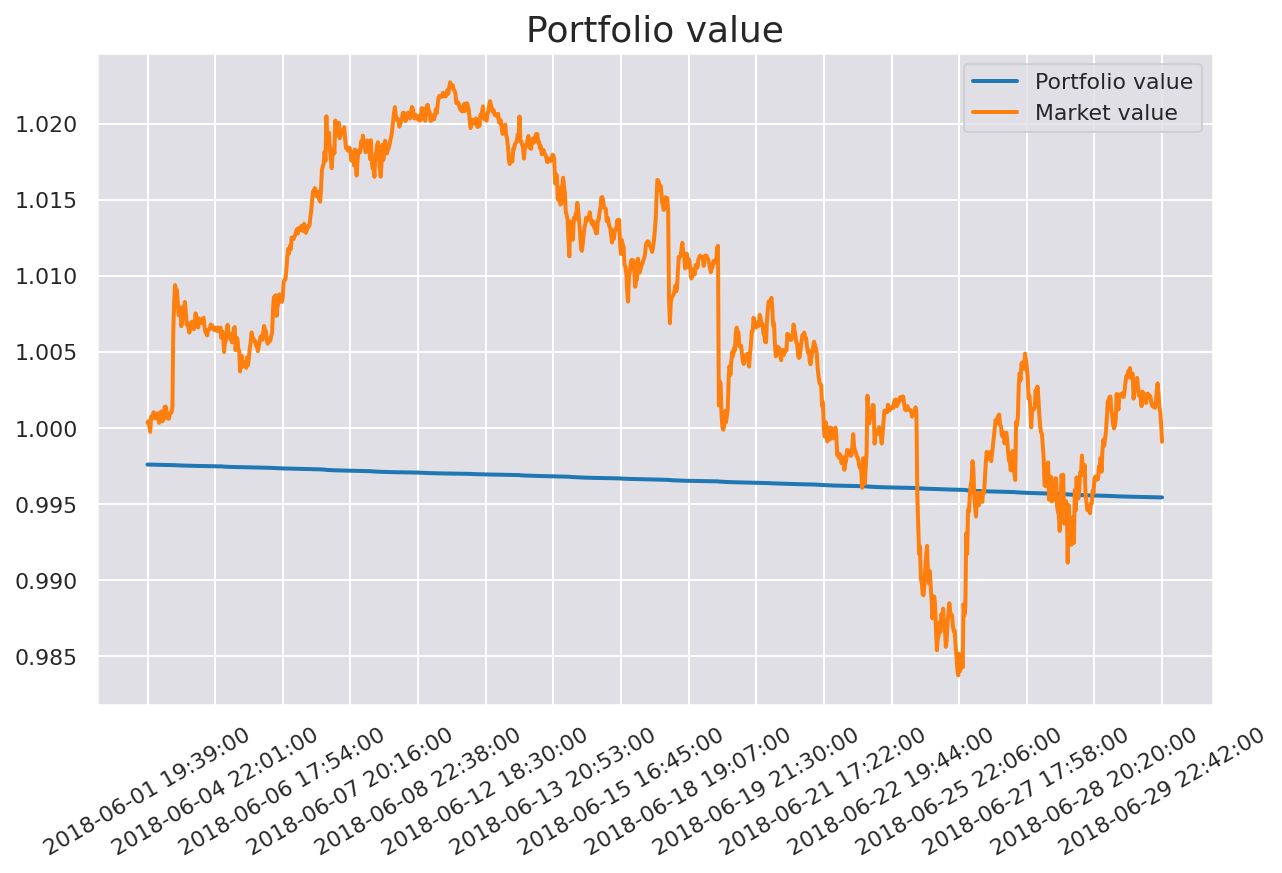

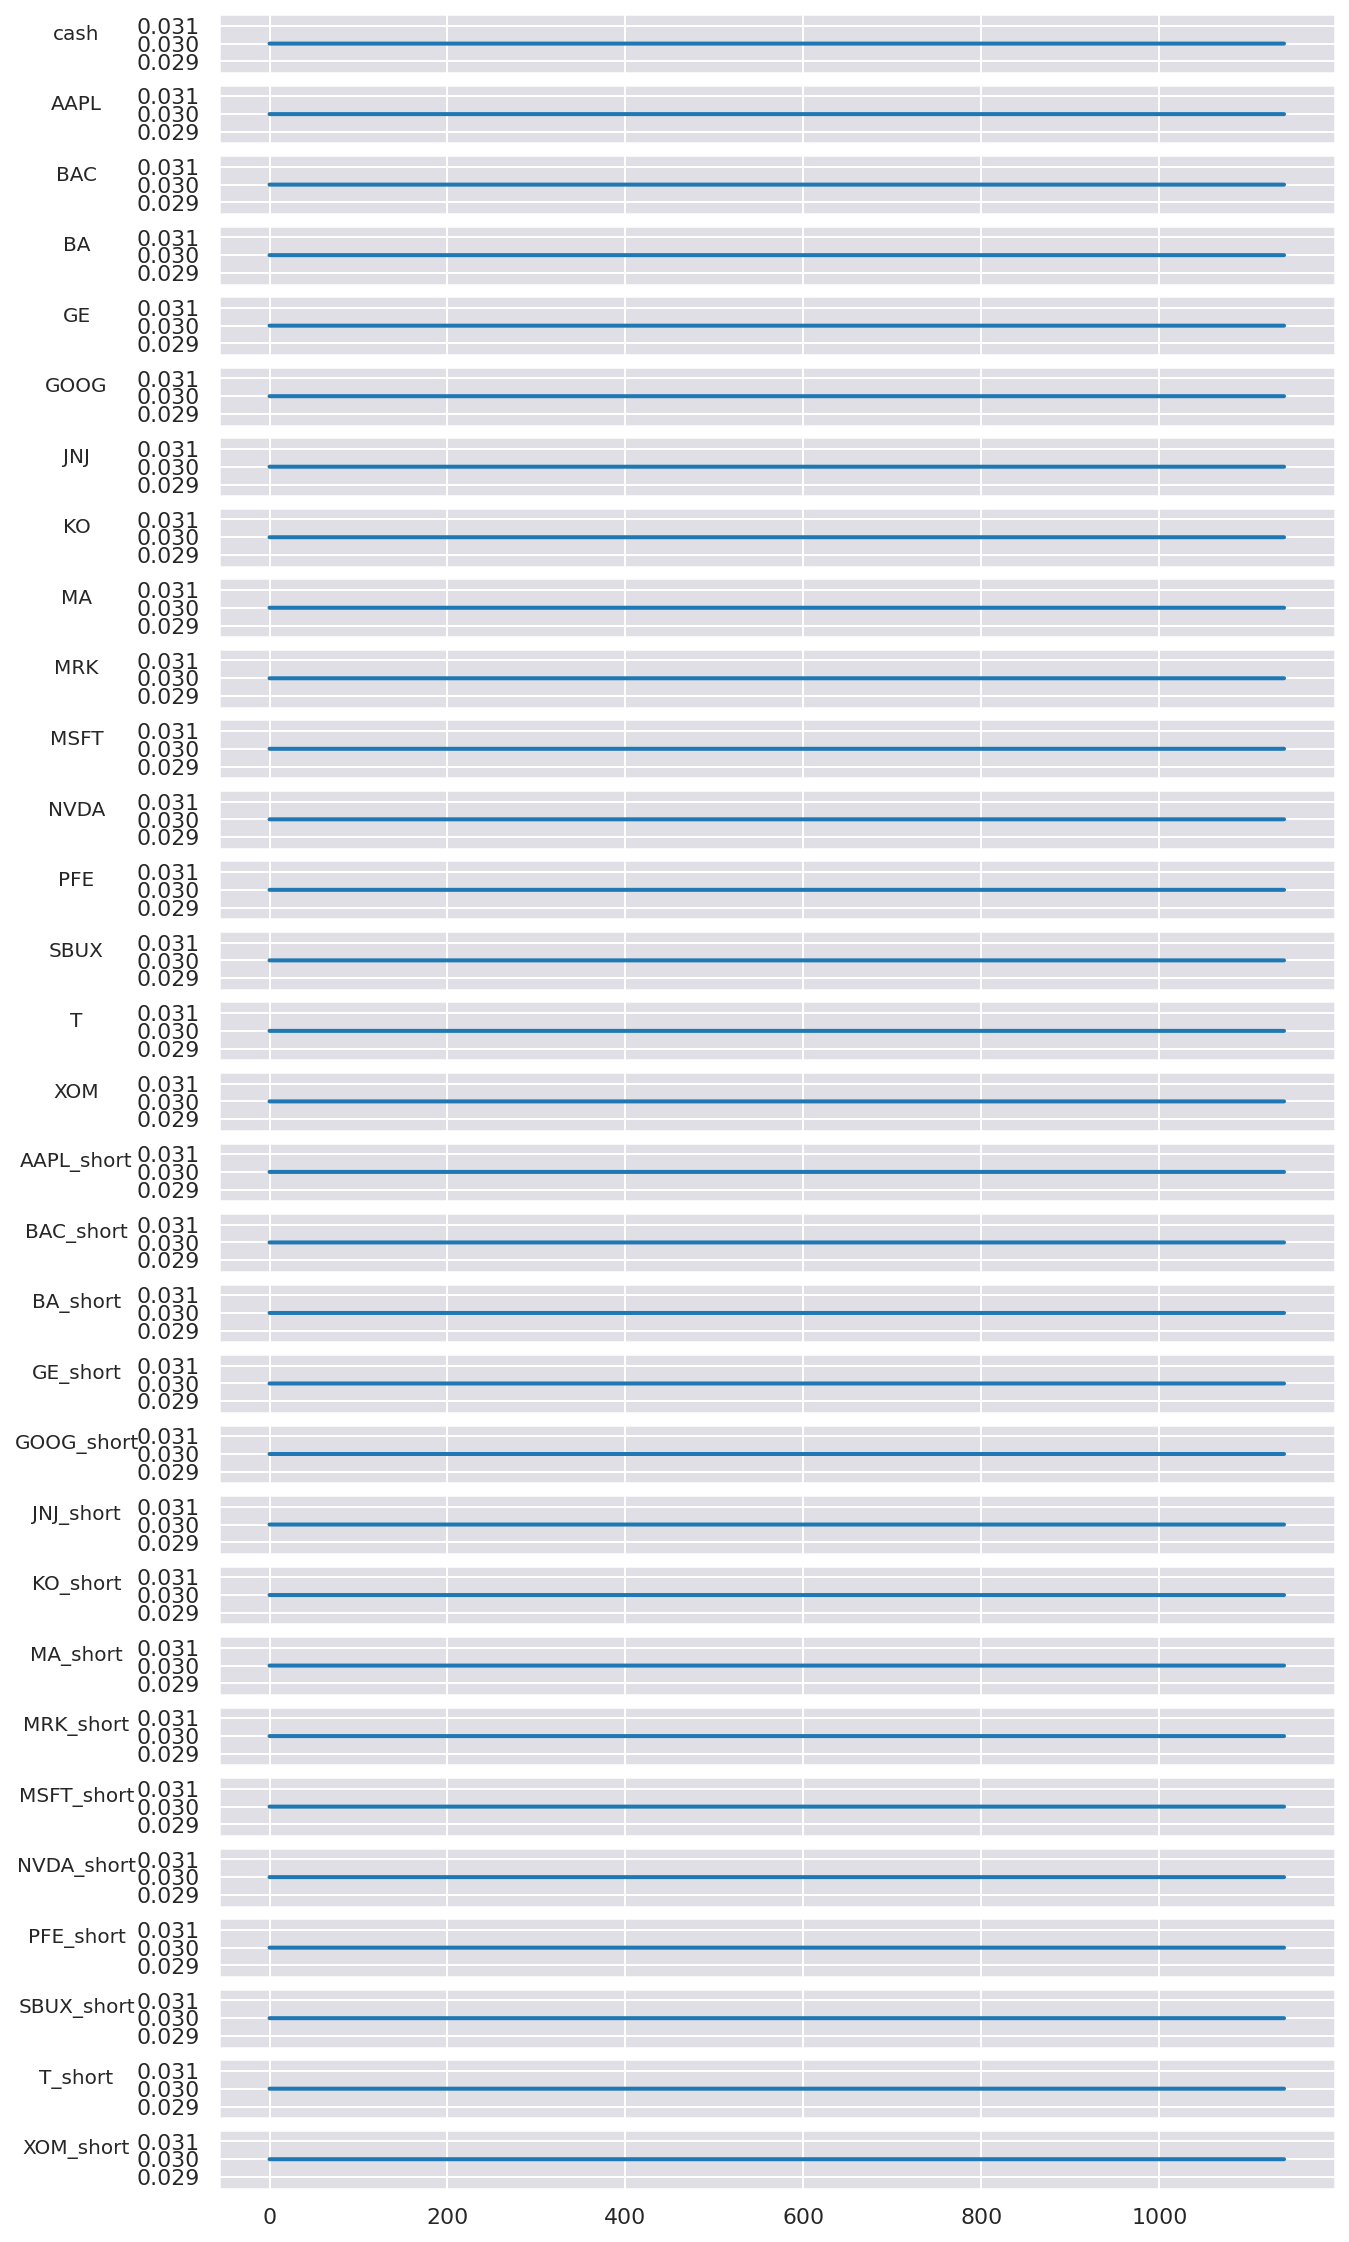

In [40]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_50/batch_norm/checkpoint.ckpt_Episode_1600/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)
    
env_Jun = PortfolioEnv(history_Jun, abbreviation, steps=history_Jun.shape[1]-200, window_length=window_length,
                   start_idx=data['Jun'].date_index.iloc[0])
test_model(env_Jun, ddpg_model)
plot_weights(env_Jun.infos)

Traceback (most recent call last):
  File "/workspace/DDPG-portfolio-management/model/ddpg/ddpg.py", line 61, in initialize
    saver.restore(self.sess, self.model_save_path)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1280, in restore
    if not checkpoint_management.checkpoint_exists_internal(checkpoint_prefix):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/checkpoint_management.py", line 366, in checkpoint_exists_internal
    if file_io.get_matching_files(pathname):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 363, in get_matching_files
    return get_matching_files_v2(filename)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 384, in get_matching_files_v2
    compat.as_bytes(pattern))
tensorflow.python.framework.errors_impl.NotFoundError: weights/stock/lstm/window_30/batch_norm/Model_Jun/checkpoint.ckpt_E

Build model from scratch


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


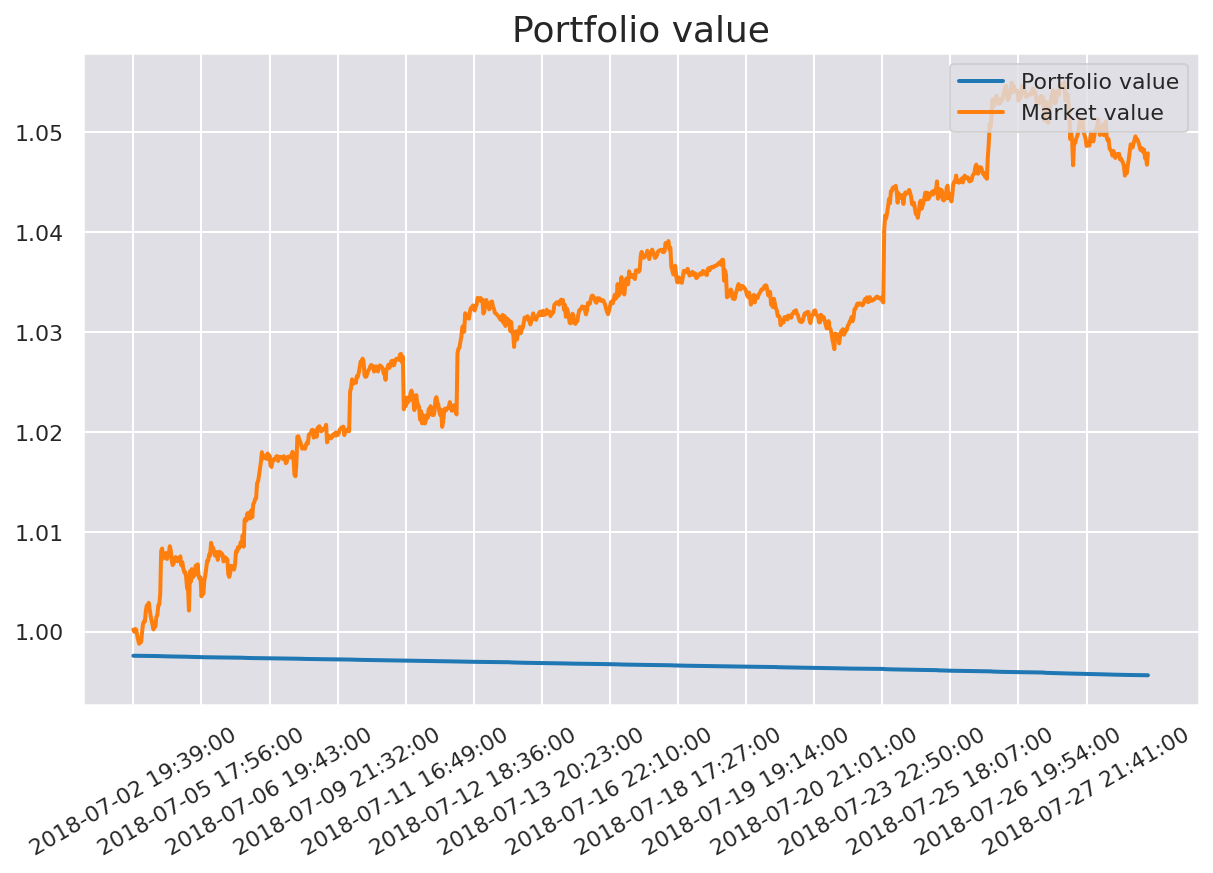

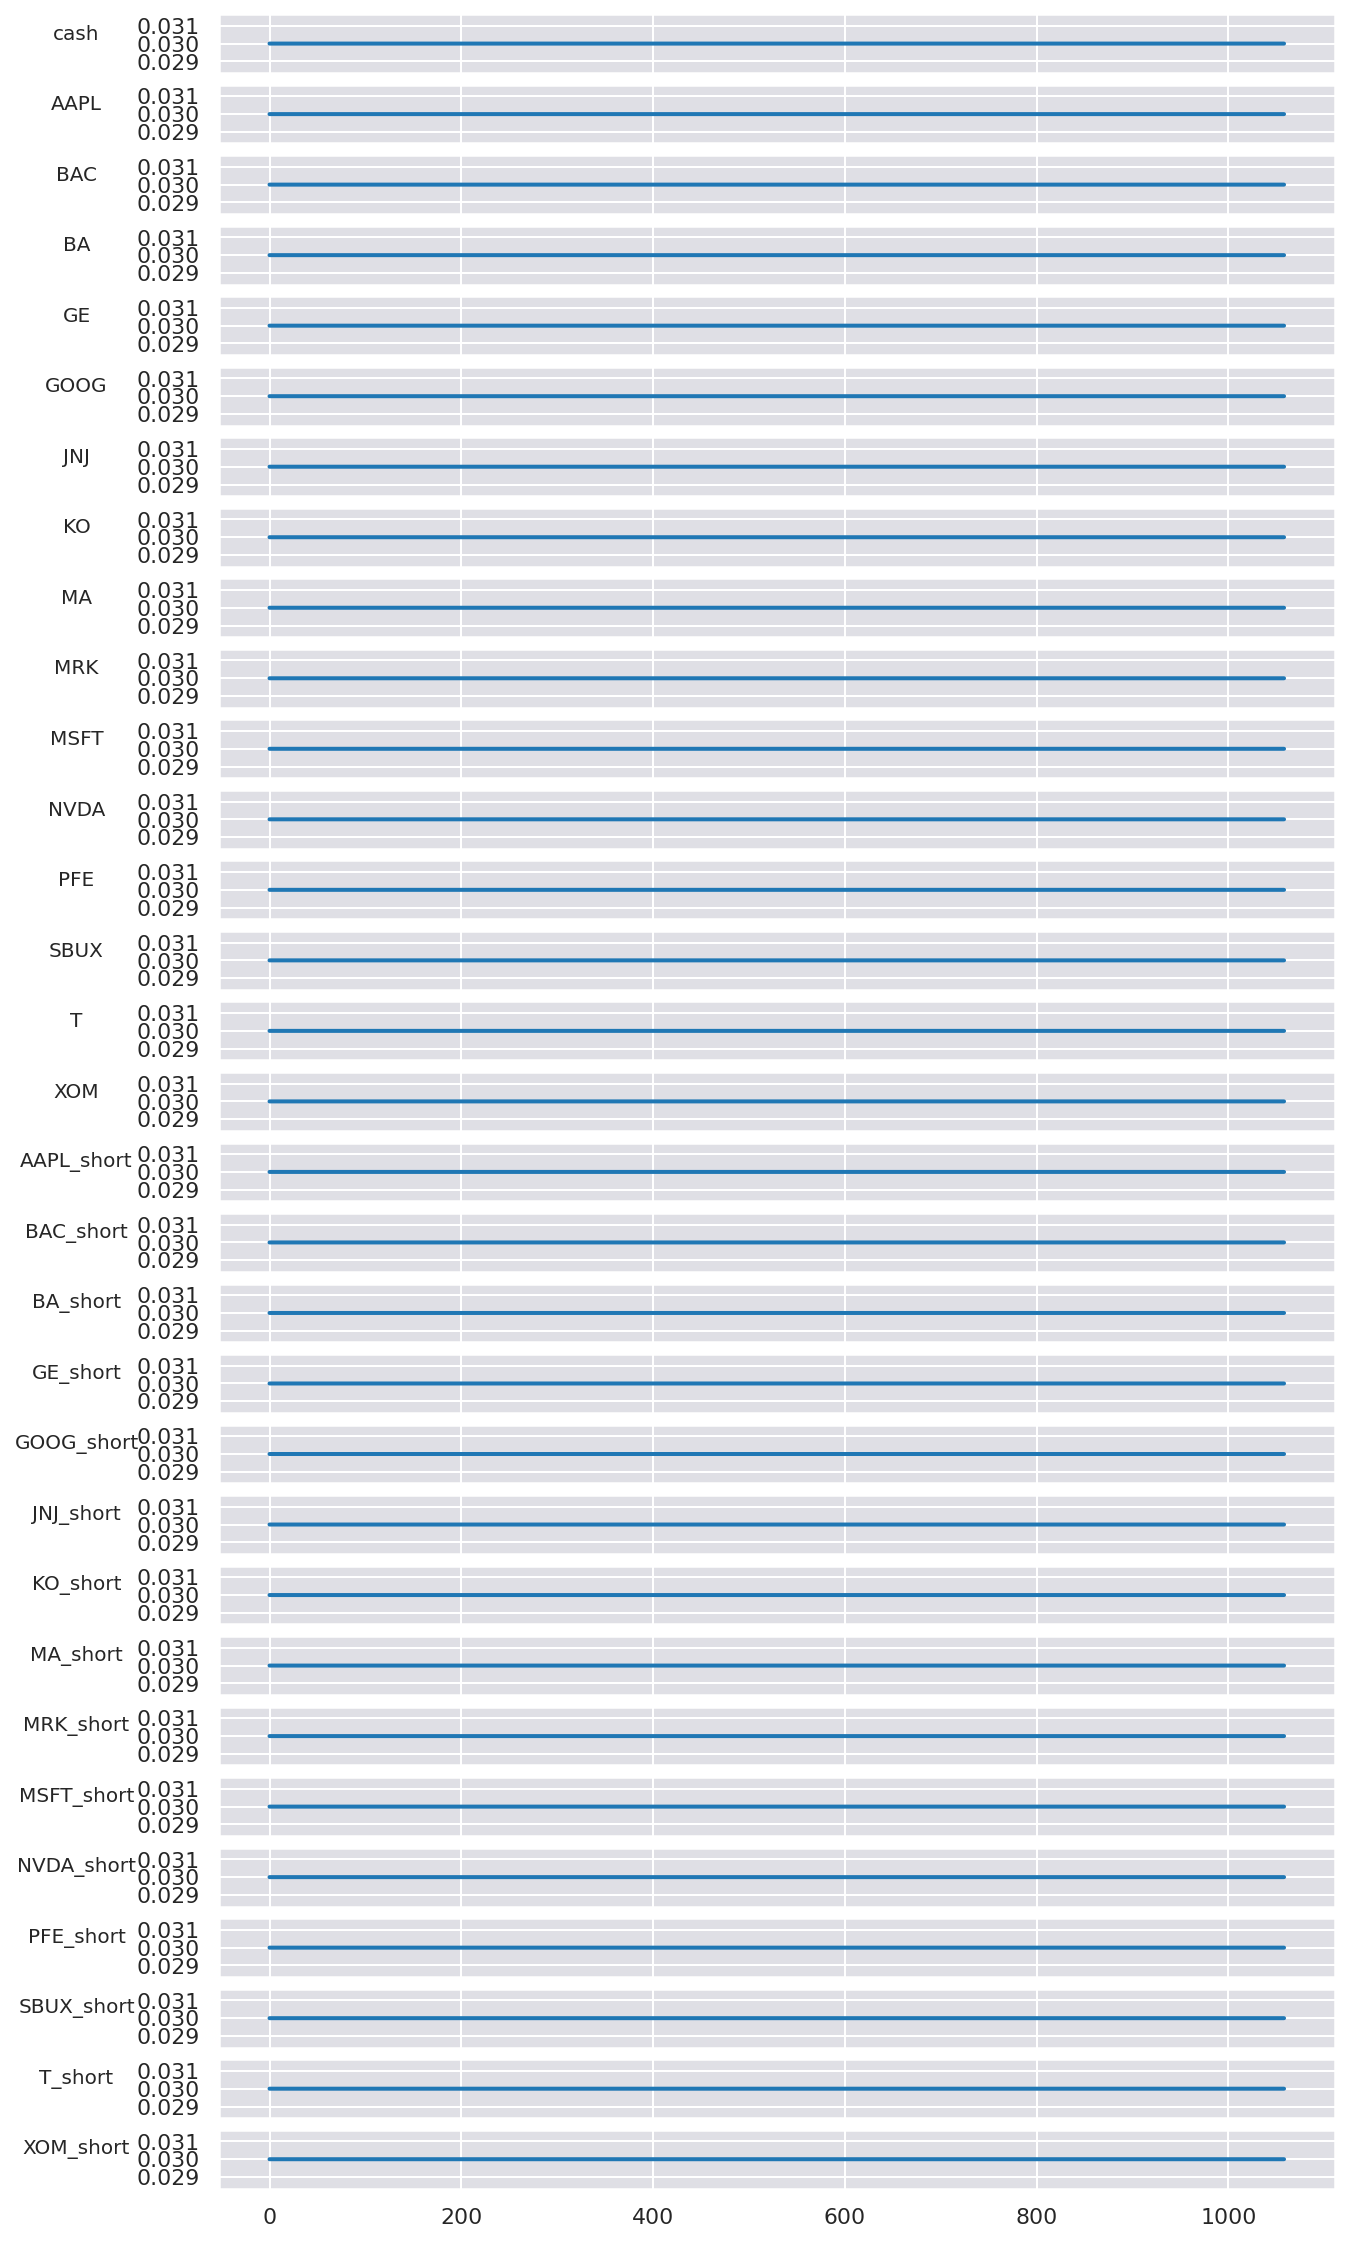

In [41]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_50/batch_norm/Model_Jun/checkpoint.ckpt_Episode_1600/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

env_Jul = PortfolioEnv(history_Jul, abbreviation, steps=history_Jul.shape[1]-200, window_length=window_length,
                   start_idx=data['Jul'].date_index.iloc[0])
test_model(env_Jul, ddpg_model)
plot_weights(env_Jul.infos)

Traceback (most recent call last):
  File "/workspace/DDPG-portfolio-management/model/ddpg/ddpg.py", line 61, in initialize
    saver.restore(self.sess, self.model_save_path)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1280, in restore
    if not checkpoint_management.checkpoint_exists_internal(checkpoint_prefix):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/checkpoint_management.py", line 366, in checkpoint_exists_internal
    if file_io.get_matching_files(pathname):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 363, in get_matching_files
    return get_matching_files_v2(filename)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 384, in get_matching_files_v2
    compat.as_bytes(pattern))
tensorflow.python.framework.errors_impl.NotFoundError: weights/stock/lstm/window_30/batch_norm/Model_Jul/checkpoint.ckpt_E

Build model from scratch


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


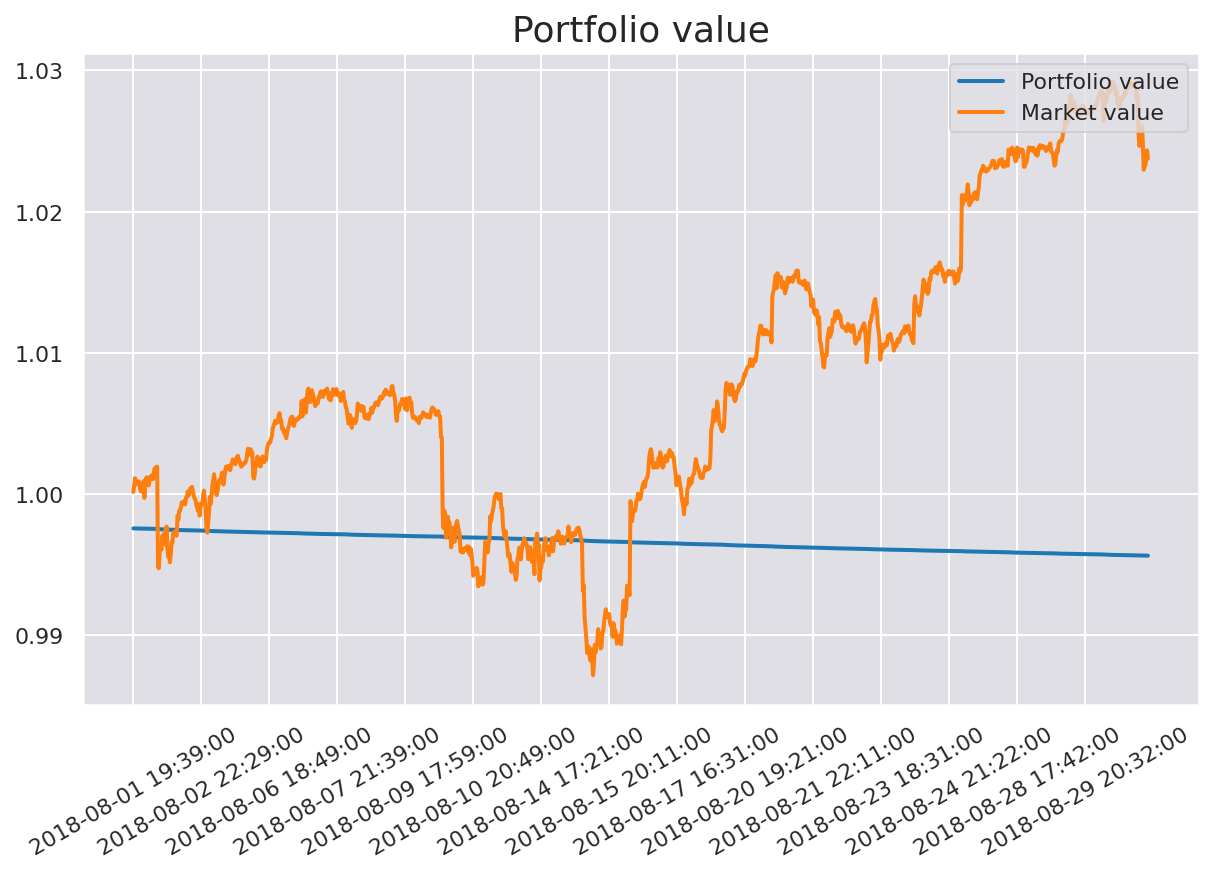

In [42]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_50/batch_norm/Model_Jul/checkpoint.ckpt_Episode_1600/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

env_Aug = PortfolioEnv(history_Aug, abbreviation, steps=history_Aug.shape[1]-200, window_length=window_length,
                   start_idx=data['Aug'].date_index.iloc[0])
test_model(env_Aug, ddpg_model)
plot_weights(env_Aug.infos)

In [43]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_50/batch_norm/Model_Aug/checkpoint.ckpt_Episode_1600/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

env_Sep = PortfolioEnv(history_Sep, abbreviation, steps=history_Sep.shape[1]-200, window_length=window_length,
                   start_idx=data['Sep'].date_index.iloc[0])
test_model(env_Sep, ddpg_model)
plot_weights(env_Sep.infos)

Traceback (most recent call last):
  File "/workspace/DDPG-portfolio-management/model/ddpg/ddpg.py", line 61, in initialize
    saver.restore(self.sess, self.model_save_path)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1280, in restore
    if not checkpoint_management.checkpoint_exists_internal(checkpoint_prefix):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/checkpoint_management.py", line 366, in checkpoint_exists_internal
    if file_io.get_matching_files(pathname):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 363, in get_matching_files
    return get_matching_files_v2(filename)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 384, in get_matching_files_v2
    compat.as_bytes(pattern))
tensorflow.python.framework.errors_impl.NotFoundError: weights/stock/lstm/window_30/batch_norm/Model_Aug/checkpoint.ckpt_E

Build model from scratch


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Traceback (most recent call last):
  File "/workspace/DDPG-portfolio-management/model/ddpg/ddpg.py", line 61, in initialize
    saver.restore(self.sess, self.model_save_path)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1280, in restore
    if not checkpoint_management.checkpoint_exists_internal(checkpoint_prefix):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/training/checkpoint_management.py", line 366, in checkpoint_exists_internal
    if file_io.get_matching_files(pathname):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 363, in get_matching_files
    return get_matching_files_v2(filename)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/lib/io/file_io.py", line 384, in get_matching_files_v2
    compat.as_bytes(pattern))
tensorflow.python.framework.errors_impl.NotFoundError: weights/stock/lstm/window_30/batch_norm/Model_Sep/checkpoint.ckpt_E

Build model from scratch


/opt/conda/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


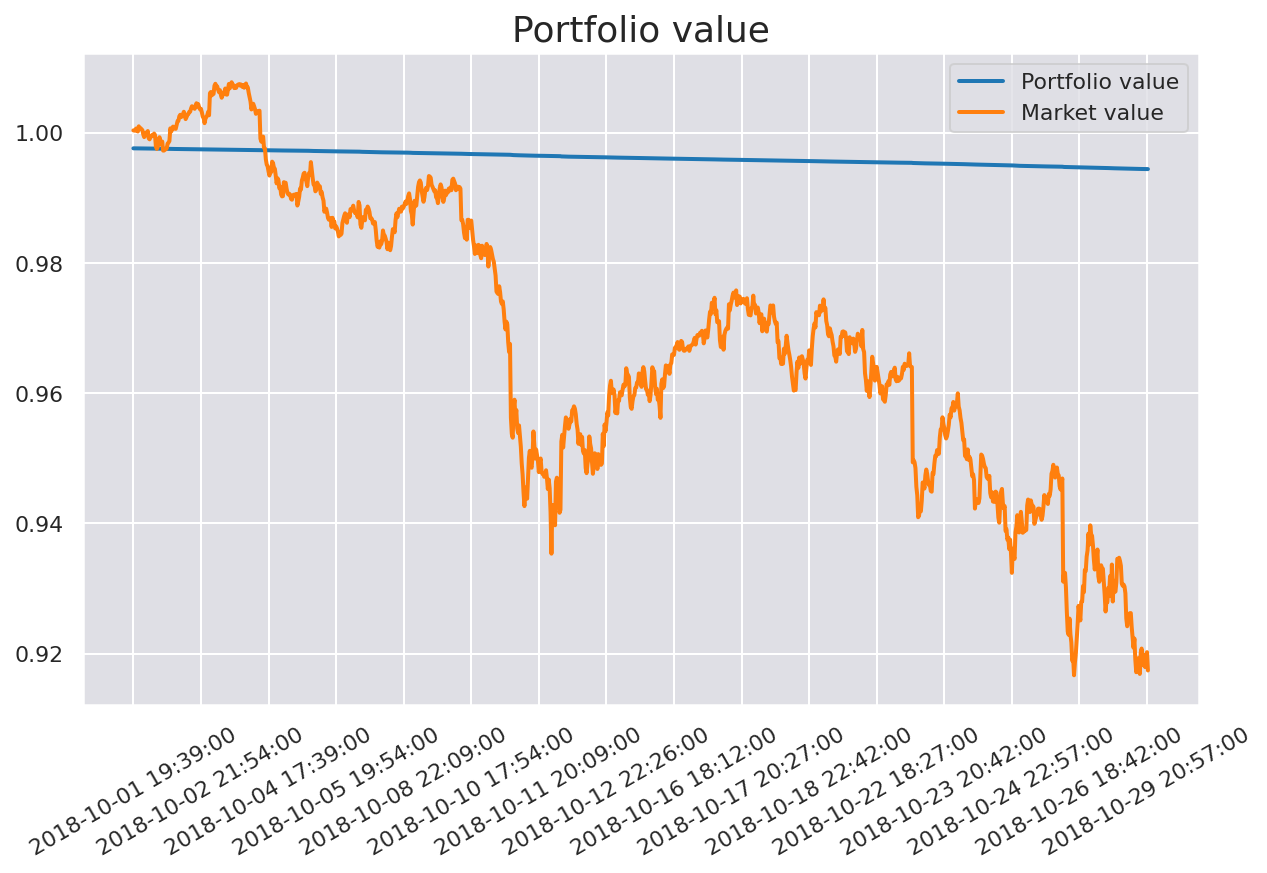

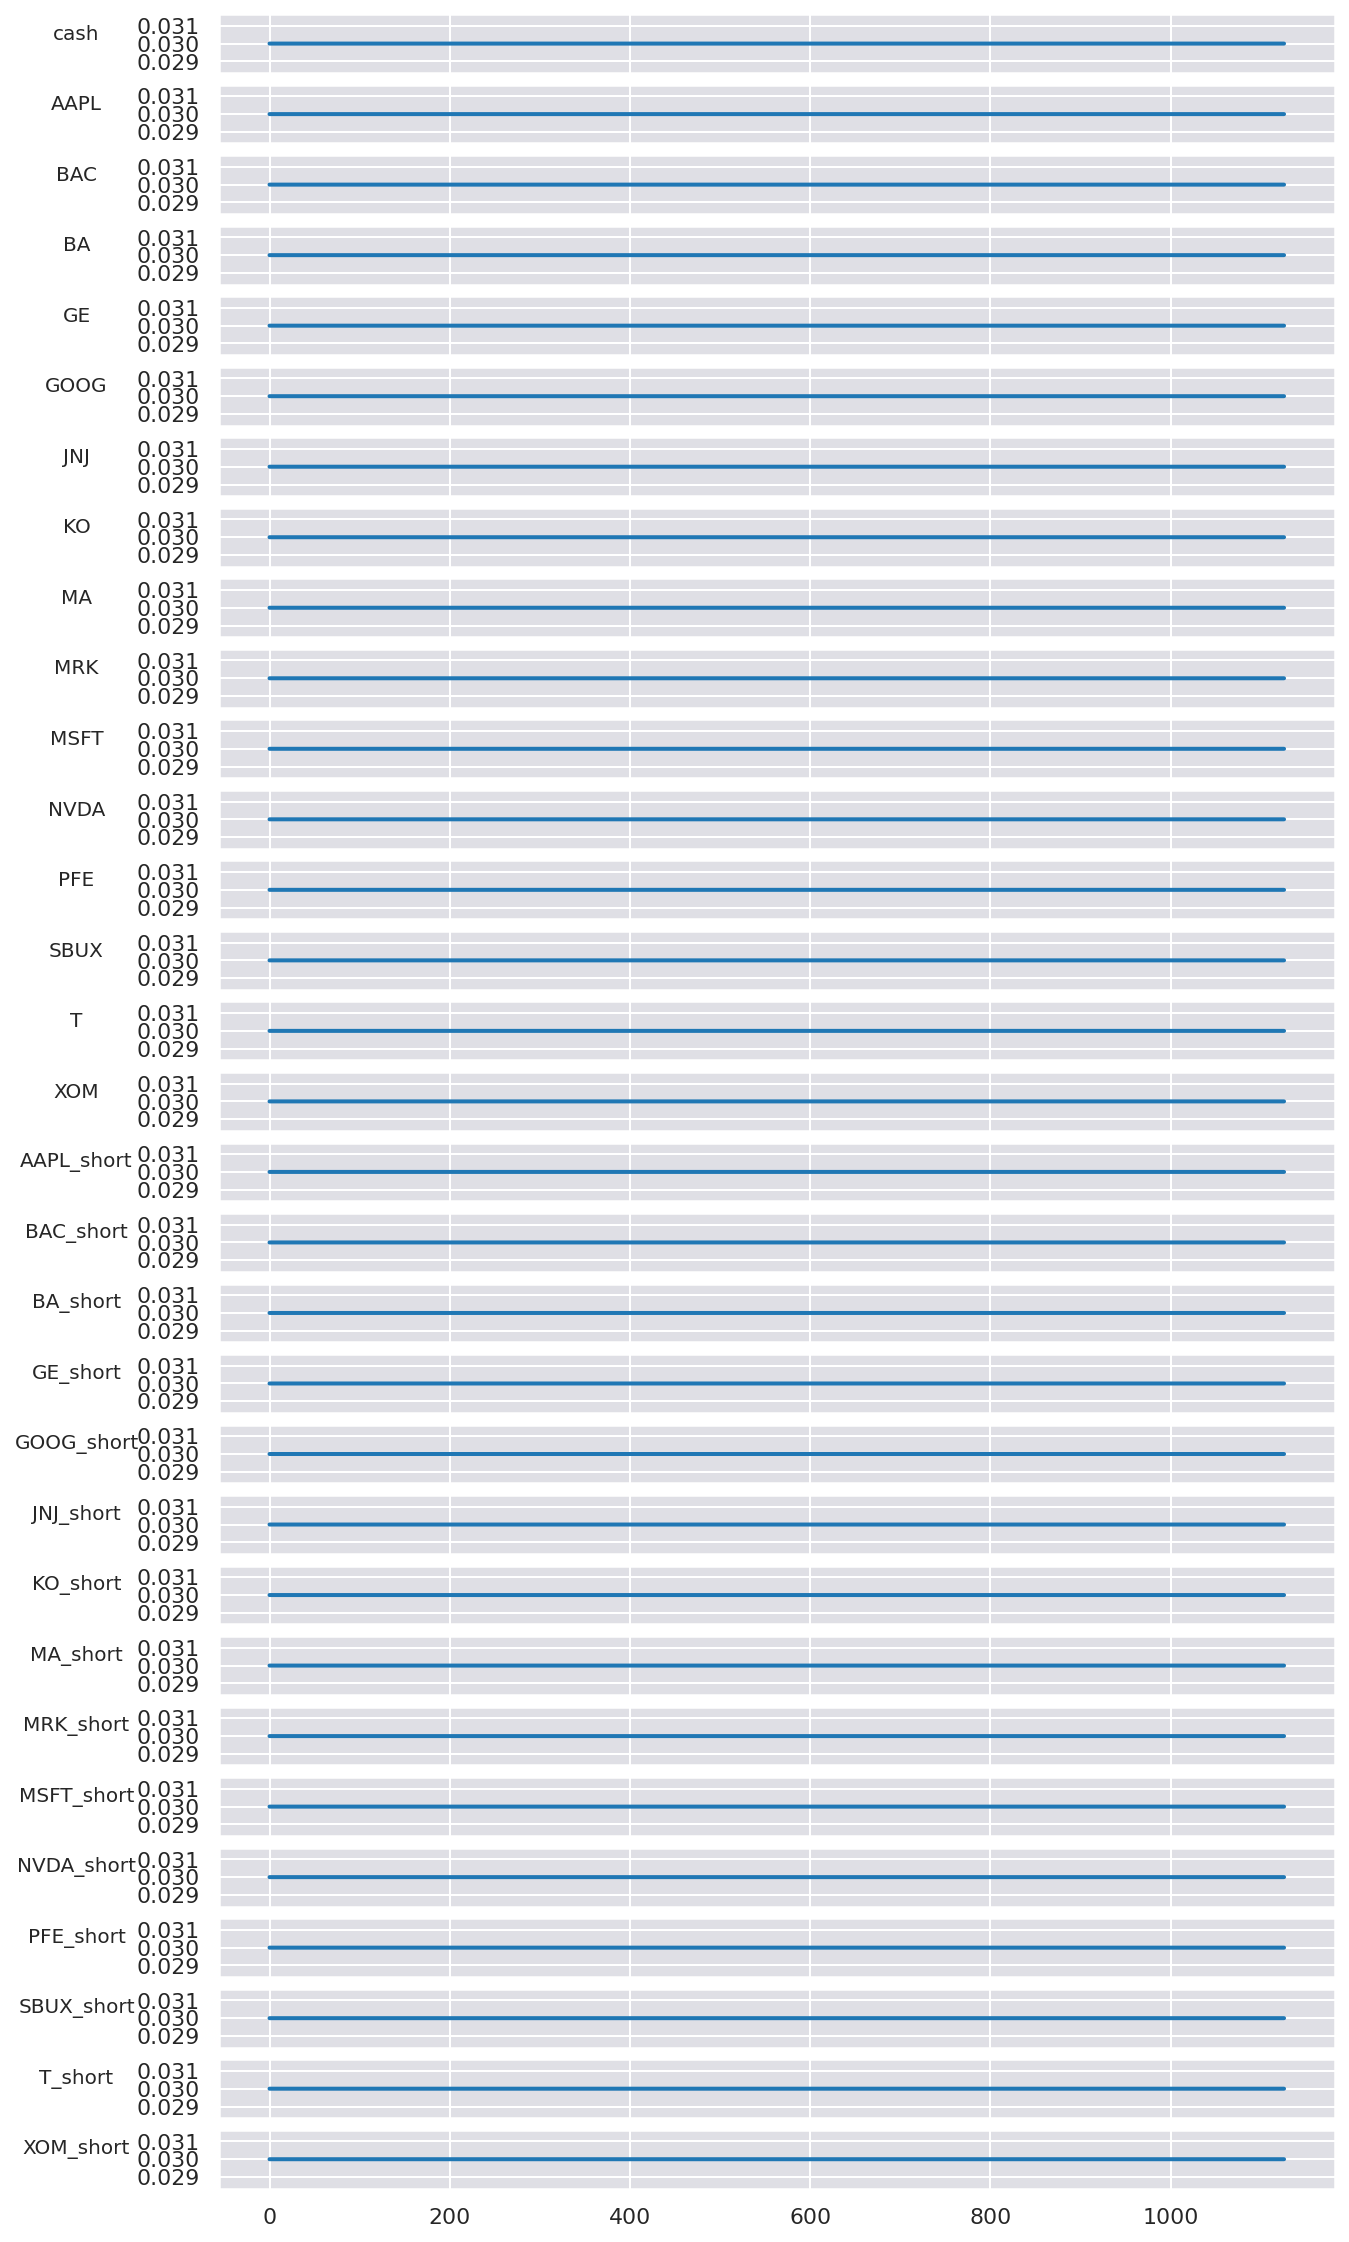

In [44]:
tf.reset_default_graph()
sess = tf.Session()
tflearn.config.init_training_mode()
action_dim = [nb_classes*2 + 1]
state_dim = [nb_classes + 1, window_length, 3]
variable_scope = get_variable_scope(window_length, predictor_type, use_batch_norm)
with tf.variable_scope(variable_scope):
    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, predictor_type, 
                       use_batch_norm)
    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                         learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                         predictor_type=predictor_type, use_batch_norm=use_batch_norm)
    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

    model_save_path = "weights/stock/lstm/window_50/batch_norm/Model_Sep/checkpoint.ckpt_Episode_1600/checkpoint.ckpt"
    summary_path = get_result_path(window_length, predictor_type, use_batch_norm)

    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                      config_file='config/stock.json', model_save_path=model_save_path,
                      summary_path=summary_path)
    ddpg_model.initialize(load_weights=True, verbose=False)

env_Oct = PortfolioEnv(history_Oct, abbreviation, steps=history_Oct.shape[1]-200, window_length=window_length,
                   start_idx=data['Oct'].date_index.iloc[0])
test_model(env_Oct, ddpg_model)
plot_weights(env_Oct.infos)

Final P/L from 2018/02/01 to 2018/10/29

In [45]:
1*env_Feb.infos[-1]['portfolio_value']*env_Mar.infos[-1]['portfolio_value']*env_Apr.infos[-1]['portfolio_value']*env_May.infos[-1]['portfolio_value']*env_Jun.infos[-1]['portfolio_value']*env_Jul.infos[-1]['portfolio_value']*env_Aug.infos[-1]['portfolio_value']*env_Sep.infos[-1]['portfolio_value']*env_Oct.infos[-1]['portfolio_value']

0.9581370103953858

Benchmark - buy every stock(no short position) uniformly and hold.

In [46]:
1*env_Feb.infos[-1]['market_value']*env_Mar.infos[-1]['market_value']*env_Apr.infos[-1]['market_value']*env_May.infos[-1]['market_value']*env_Jun.infos[-1]['market_value']*env_Jul.infos[-1]['market_value']*env_Aug.infos[-1]['market_value']*env_Sep.infos[-1]['market_value']*env_Oct.infos[-1]['market_value']

1.0563464635195277

Benchmark - buy stock with best performance last month

In [47]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [48]:
performance = dict()
for i in month:
    performance[i]=dict()

In [49]:
for j in month:
    for i in abbreviation['symbols']:
        value_change = data[j].loc[:, i+'_close'].iloc[-1]/data[j].loc[:, i+'_open'].iloc[0]
        performance[j][i] = value_change

In [50]:
performance

{'Jan': {'AAPL': 0.9809613350569985,
  'BAC': 1.0711409395973155,
  'BA': 1.1435526404760297,
  'GE': 0.9075654152445962,
  'GOOG': 1.1104635913185719,
  'JNJ': 1.0216394382344511,
  'KO': 1.0336527989544761,
  'MA': 1.1005921052631578,
  'MRK': 1.0740937223695846,
  'MSFT': 1.0773875181422352,
  'NVDA': 1.240461719188927,
  'PFE': 1.0402472527472528,
  'SBUX': 0.9887698686938492,
  'T': 0.9613118114271074,
  'XOM': 1.0366261035552375},
 'Feb': {'AAPL': 1.0695417789757413,
  'BAC': 1.0147243107769424,
  'BA': 1.0790539541759054,
  'GE': 0.909746161078032,
  'GOOG': 0.962603973327834,
  'JNJ': 0.9241829148548183,
  'KO': 0.9207753898019385,
  'MA': 1.0532261438689818,
  'MRK': 0.9018768521567336,
  'MSFT': 1.017782088587132,
  'NVDA': 1.0131714344515332,
  'PFE': 0.9716134143121206,
  'SBUX': 0.9899528219465316,
  'T': 0.9834754797441363,
  'XOM': 0.8943613348676639},
 'Mar': {'AAPL': 0.9411929431531784,
  'BAC': 0.9254284390921723,
  'BA': 0.8986408724721872,
  'GE': 0.9290144727773949

In [51]:
import operator
best_of_month = []
for i in month[:-1]:
    best_of_month.append(max(performance[i].items(), key=operator.itemgetter(1))[0])

In [52]:
best_of_month

['NVDA', 'BA', 'SBUX', 'MRK', 'NVDA', 'MRK', 'BAC', 'NVDA', 'BA']

In [53]:
month_invest = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [54]:
outcome = []
for i in range(9):
    outcome.append(performance[month_invest[i]][best_of_month[i]])

In [55]:
outcome

[1.0131714344515332,
 0.8986408724721872,
 1.0146036161335188,
 1.0015254237288136,
 0.9323994648618872,
 1.0678747940691926,
 0.9932713873758411,
 1.0034982508745627,
 0.9068782786994382]

In [56]:
np.cumprod(outcome)[-1]

0.8326900679223337